# Importing all necessary libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder

# Reading Dataset

In [2]:
data = pd.read_csv("data.csv")
dimensions = data.shape

print(f'Dimensions of dataset is: {dimensions}')

Dimensions of dataset is: (11914, 16)


In [3]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Visual Analysis of Dataset

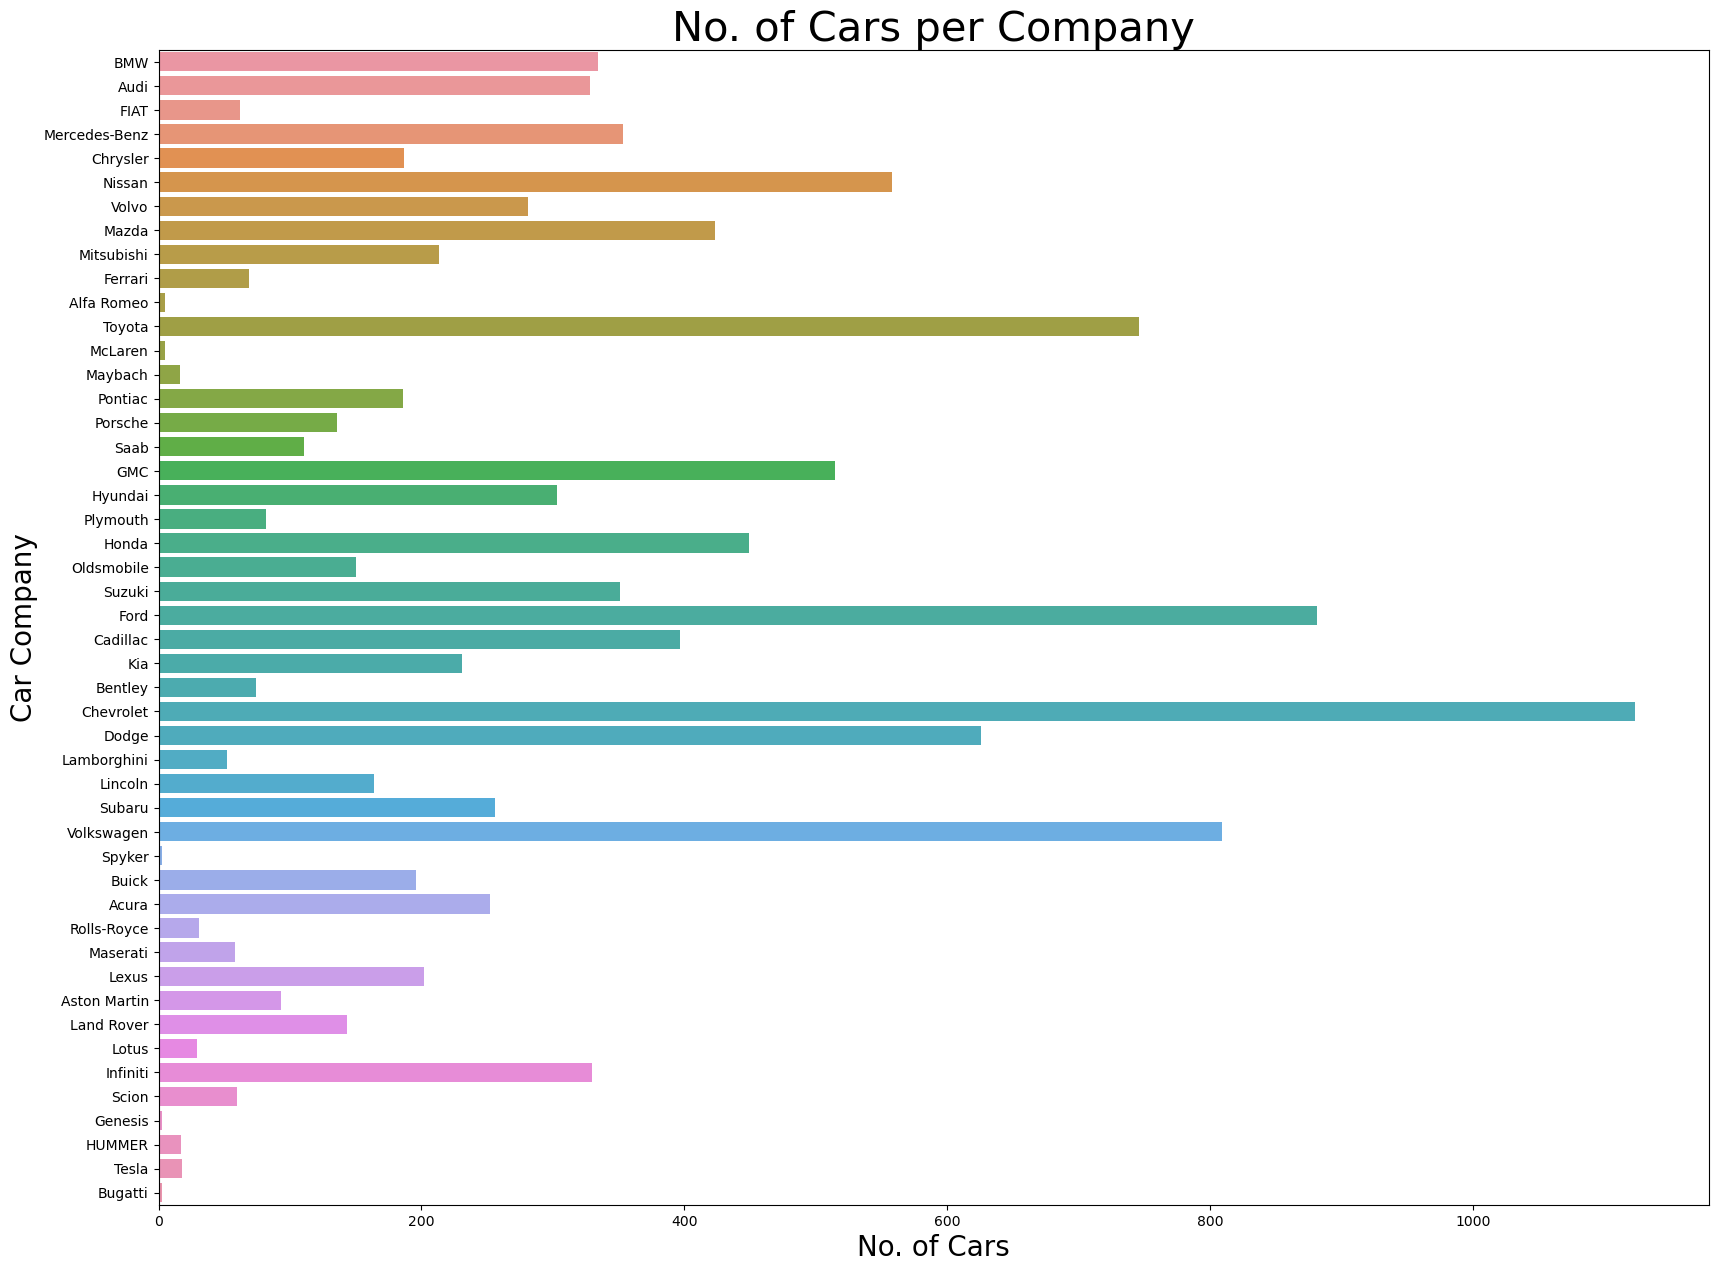

In [4]:
#Countplot to display no of cars per company(Y = Companies due to length of names)

plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.ylabel("Car Company",fontsize=20)
plt.xlabel("No. of Cars",fontsize=20)
plt.title("No. of Cars per Company", fontsize = 30)
plt.show()

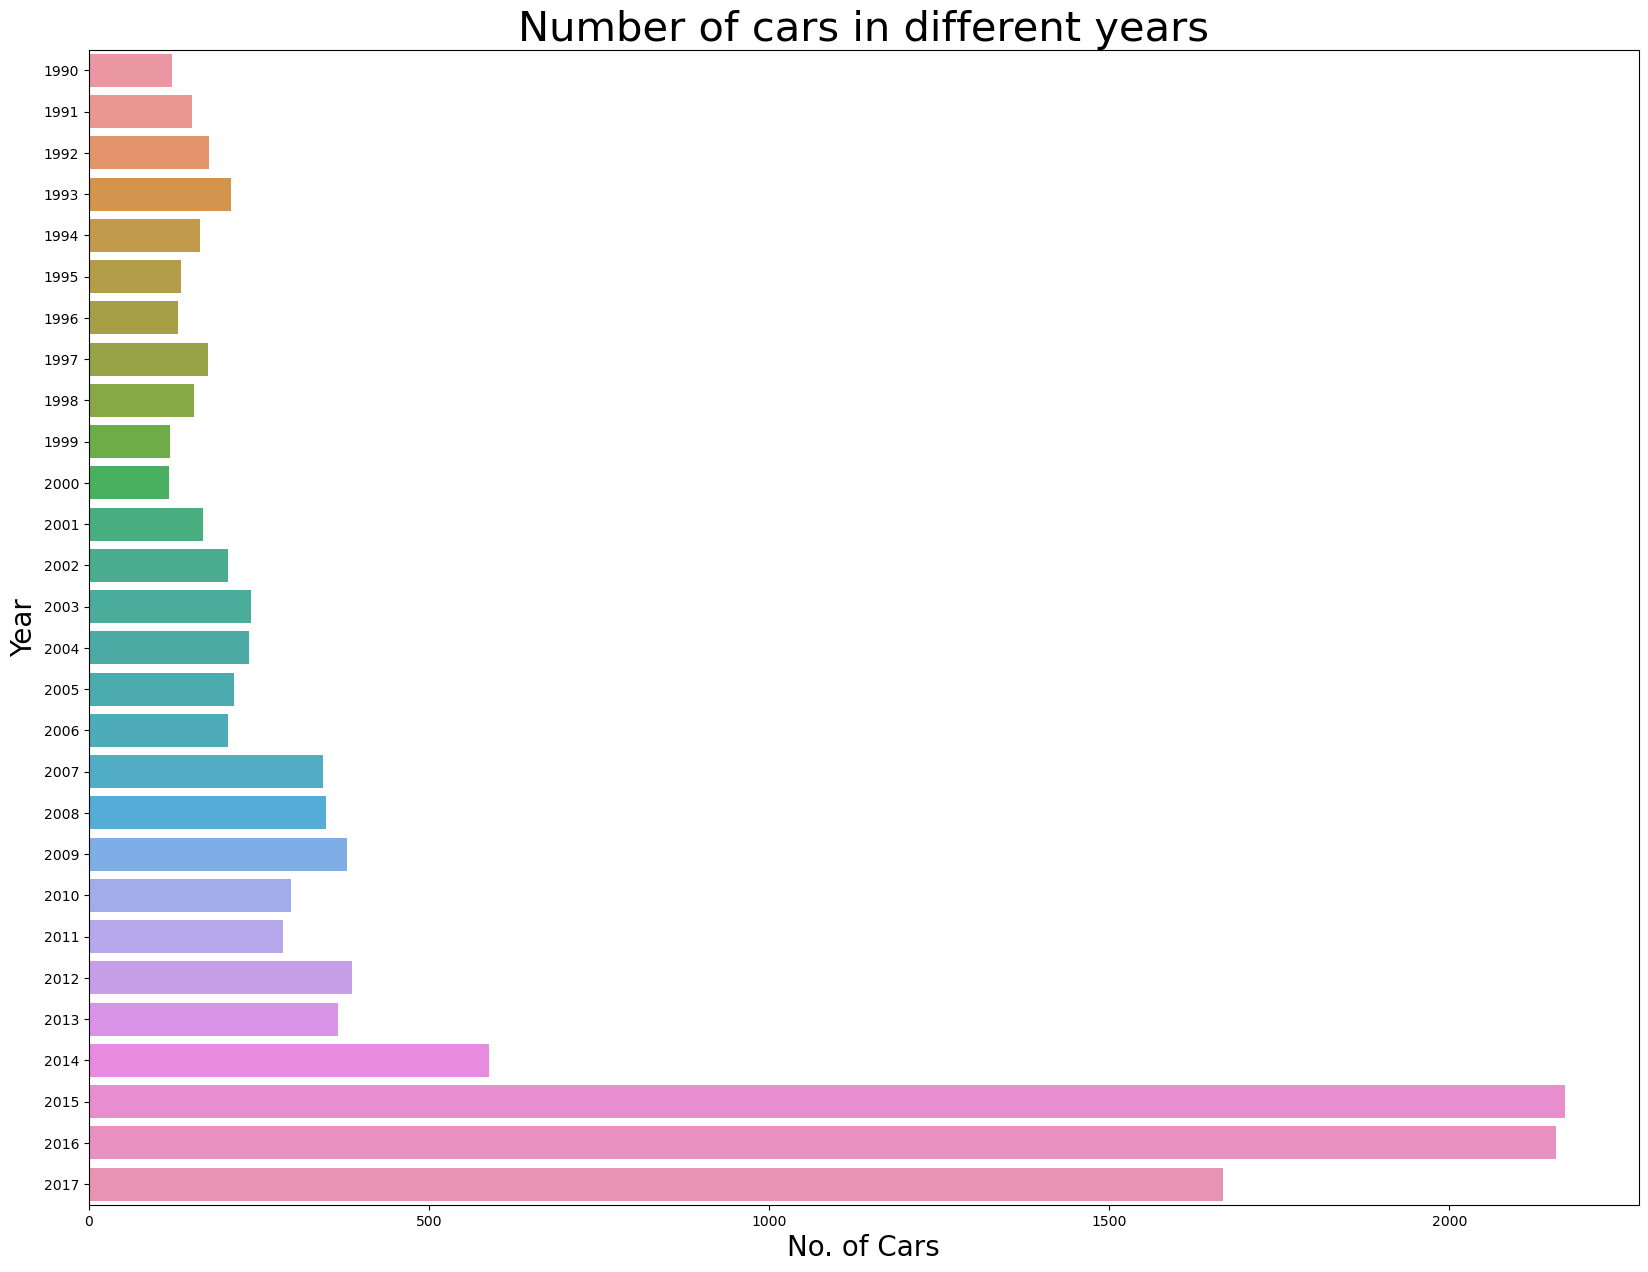

In [5]:
#Countplot to display no. of cars per year

plt.figure(figsize = (20, 15))
sns.countplot(y = data.Year)
plt.xlabel("No. of Cars",fontsize=20)
plt.ylabel("Year",fontsize=20)
plt.title("Number of cars in different years", fontsize = 30)
plt.show()

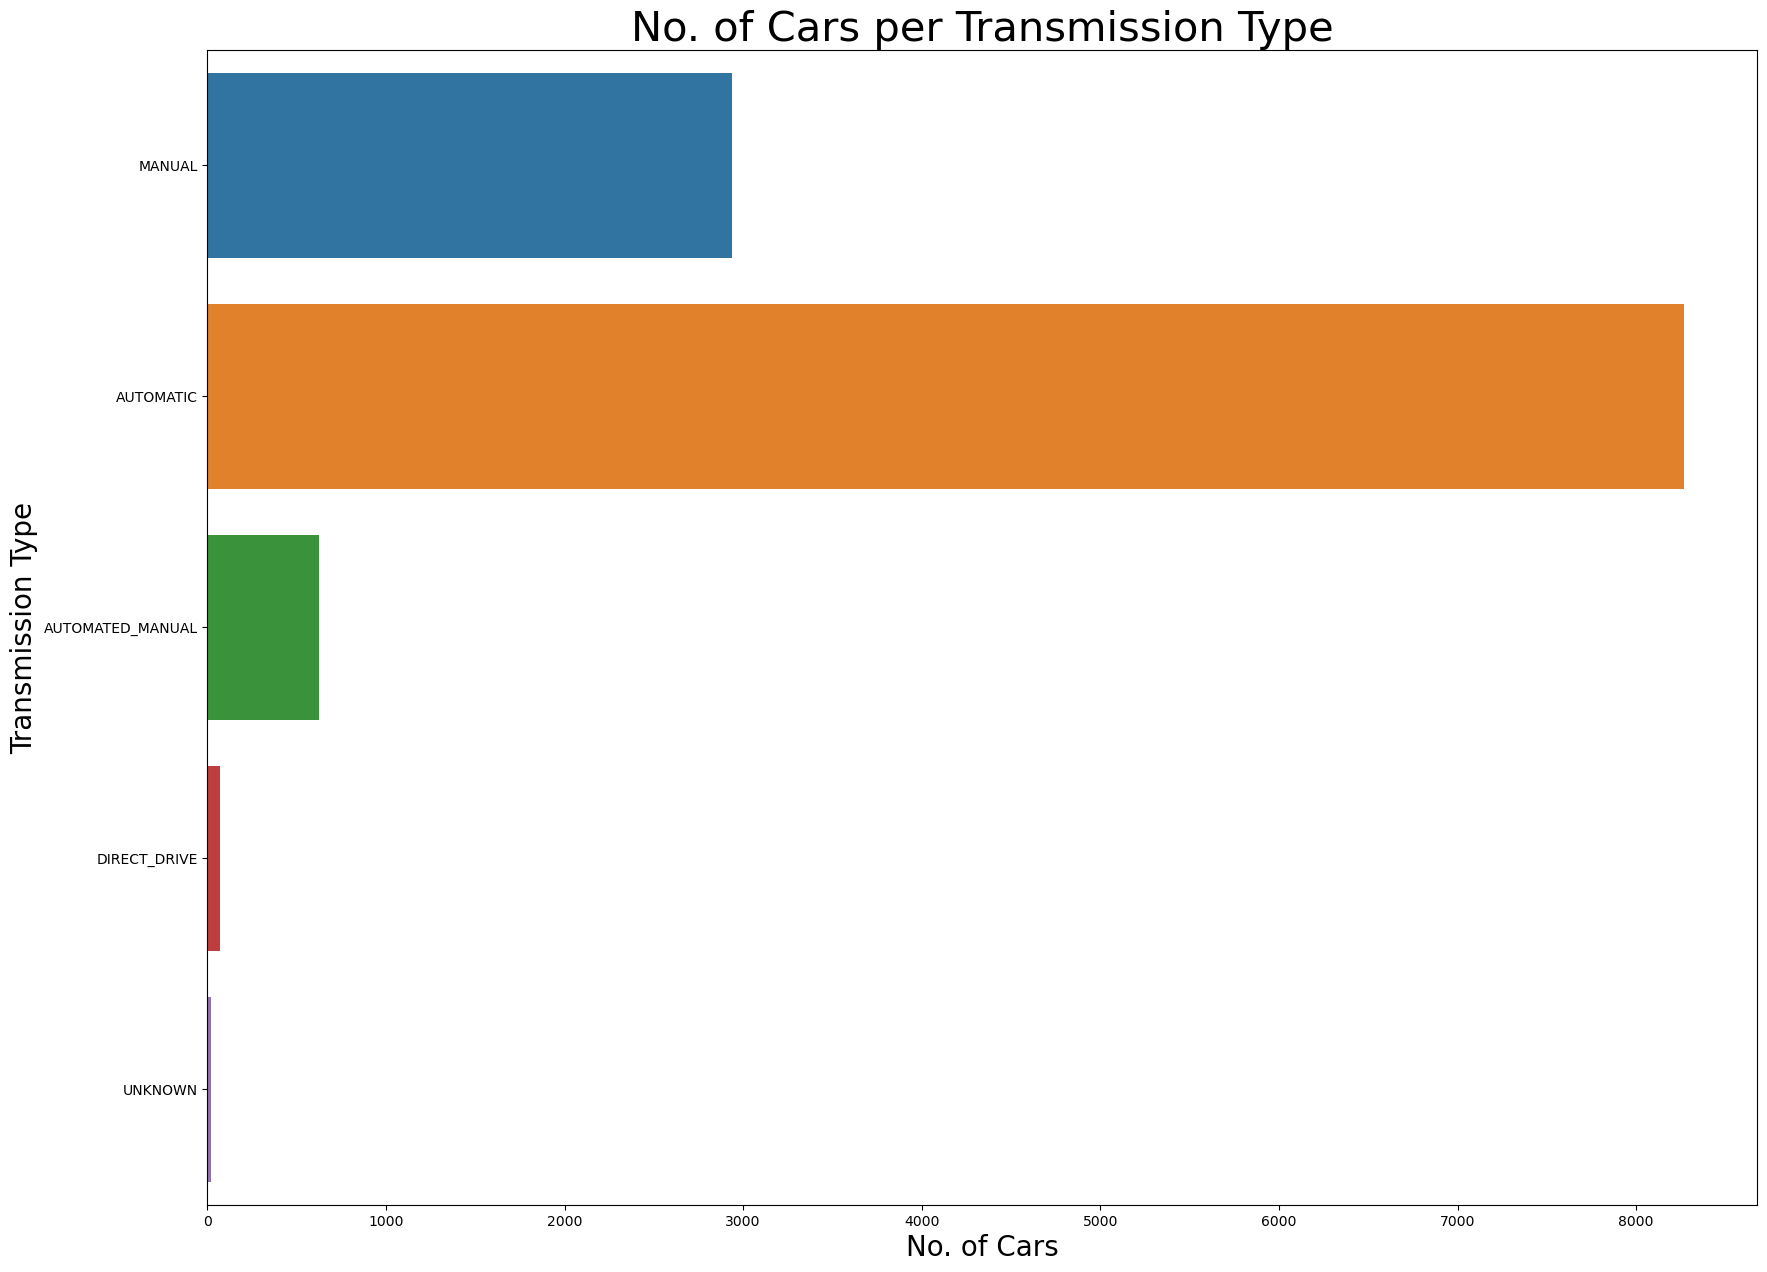

In [6]:
#Countplot to display no. of cars per transmission type

plt.figure(figsize = (20, 15))
sns.countplot(y = data['Transmission Type'])
plt.xlabel("No. of Cars",fontsize=20)
plt.ylabel("Transmission Type",fontsize=20)
plt.title("No. of Cars per Transmission Type", fontsize = 30)
plt.show()

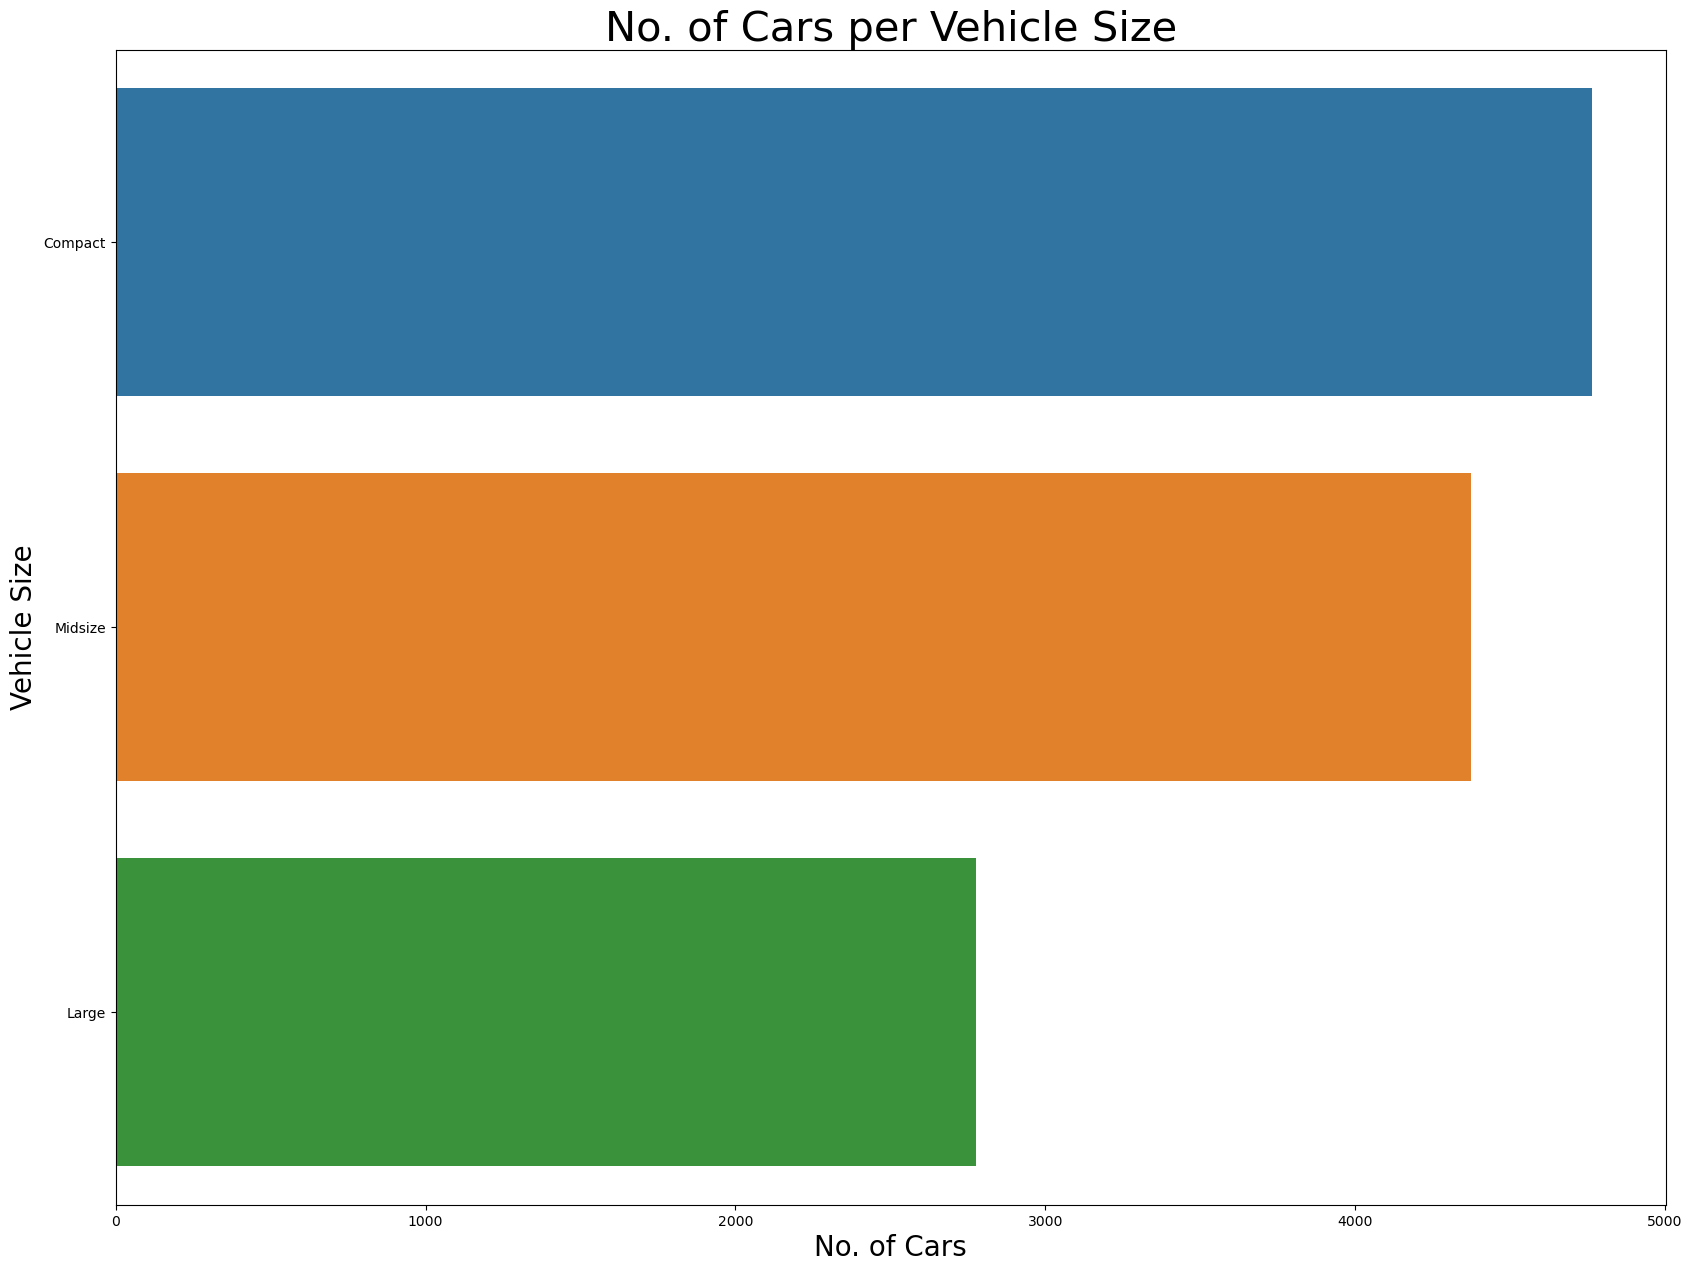

In [7]:
#Countplot to display no. of cars per vehicle size

plt.figure(figsize = (20, 15))
sns.countplot(y = data['Vehicle Size'])
plt.xlabel("No. of Cars",fontsize=20)
plt.ylabel("Vehicle Size",fontsize=20)
plt.title("No. of Cars per Vehicle Size", fontsize = 30)
plt.show()

# Preprocessing Data

<Figure size 1500x1000 with 0 Axes>

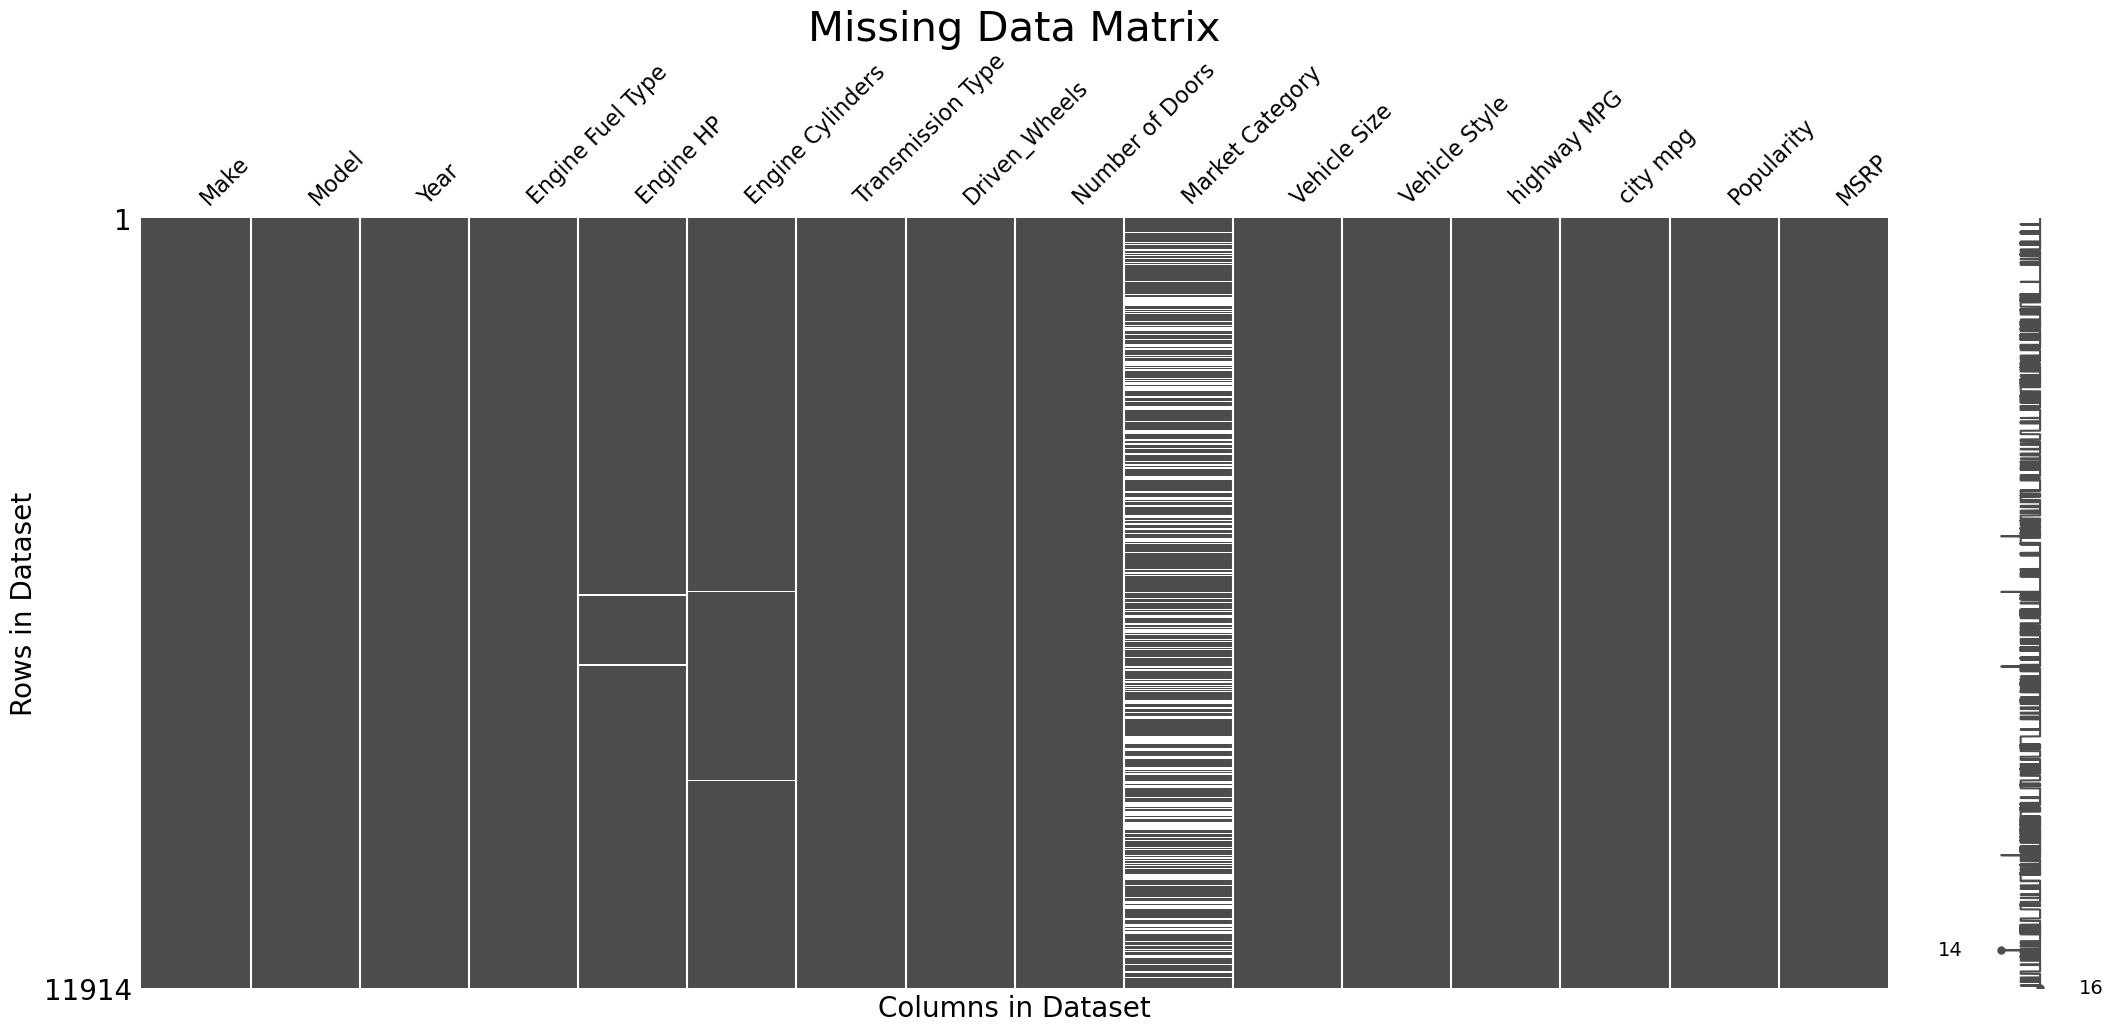

In [8]:
#Display missing values in the dataset using Missingno

plt.figure(figsize=(15, 10))
msno.matrix(data, color = (0.3,0.3,0.3))
plt.xlabel('Columns in Dataset', fontsize=20)
plt.ylabel('Rows in Dataset', fontsize=20)
plt.title('Missing Data Matrix', fontsize=30)
plt.show()

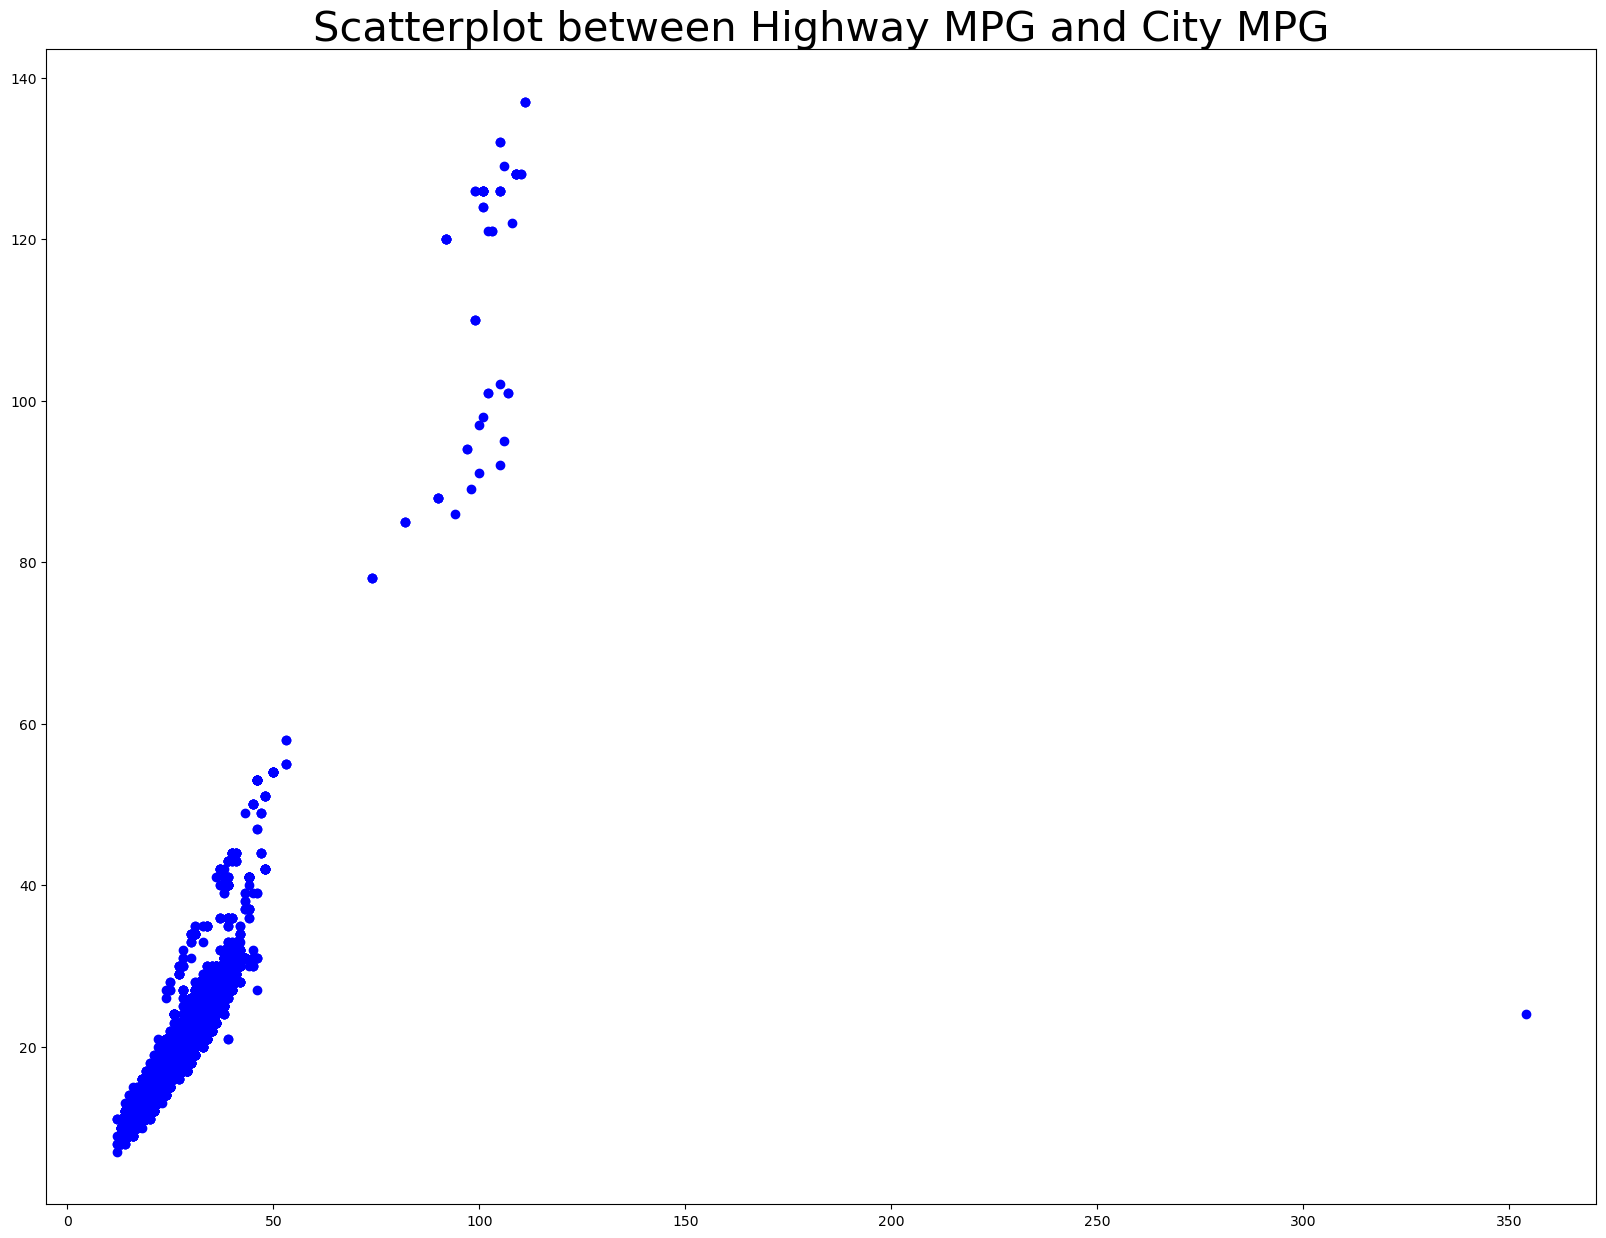

In [9]:
#Scatterplot between 'Highway MPG' and 'City MPG'

plt.figure(figsize = (20,15))
plt.scatter(x = 'highway MPG',y ='city mpg',data = data,color = 'blue')
plt.title("Scatterplot between Highway MPG and City MPG",fontsize = 30)
plt.show()

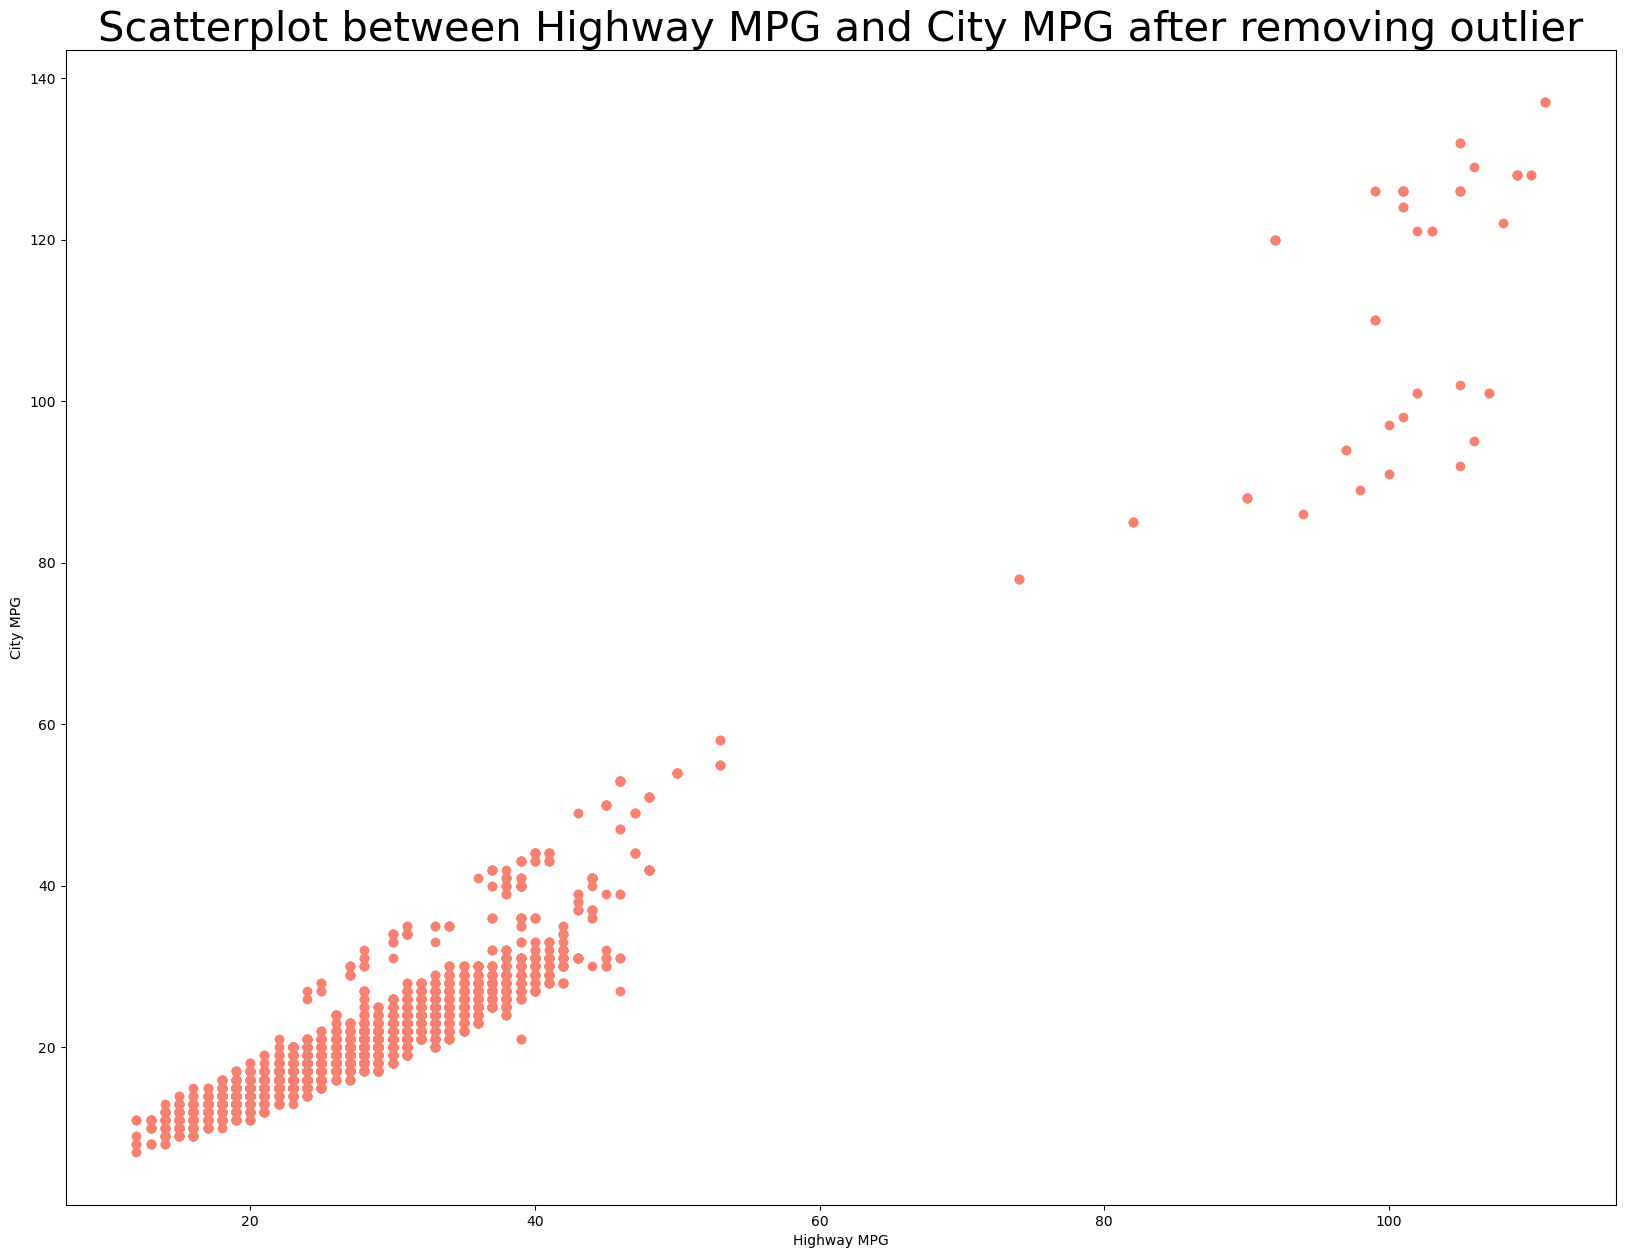

In [10]:
#Removing Outlier

data = data[data['highway MPG']<350]
plt.figure(figsize = (20,15))
plt.scatter(x = 'highway MPG',y ='city mpg',data = data,color = 'salmon')
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")
plt.title("Scatterplot between Highway MPG and City MPG after removing outlier",fontsize = 30)
plt.show()

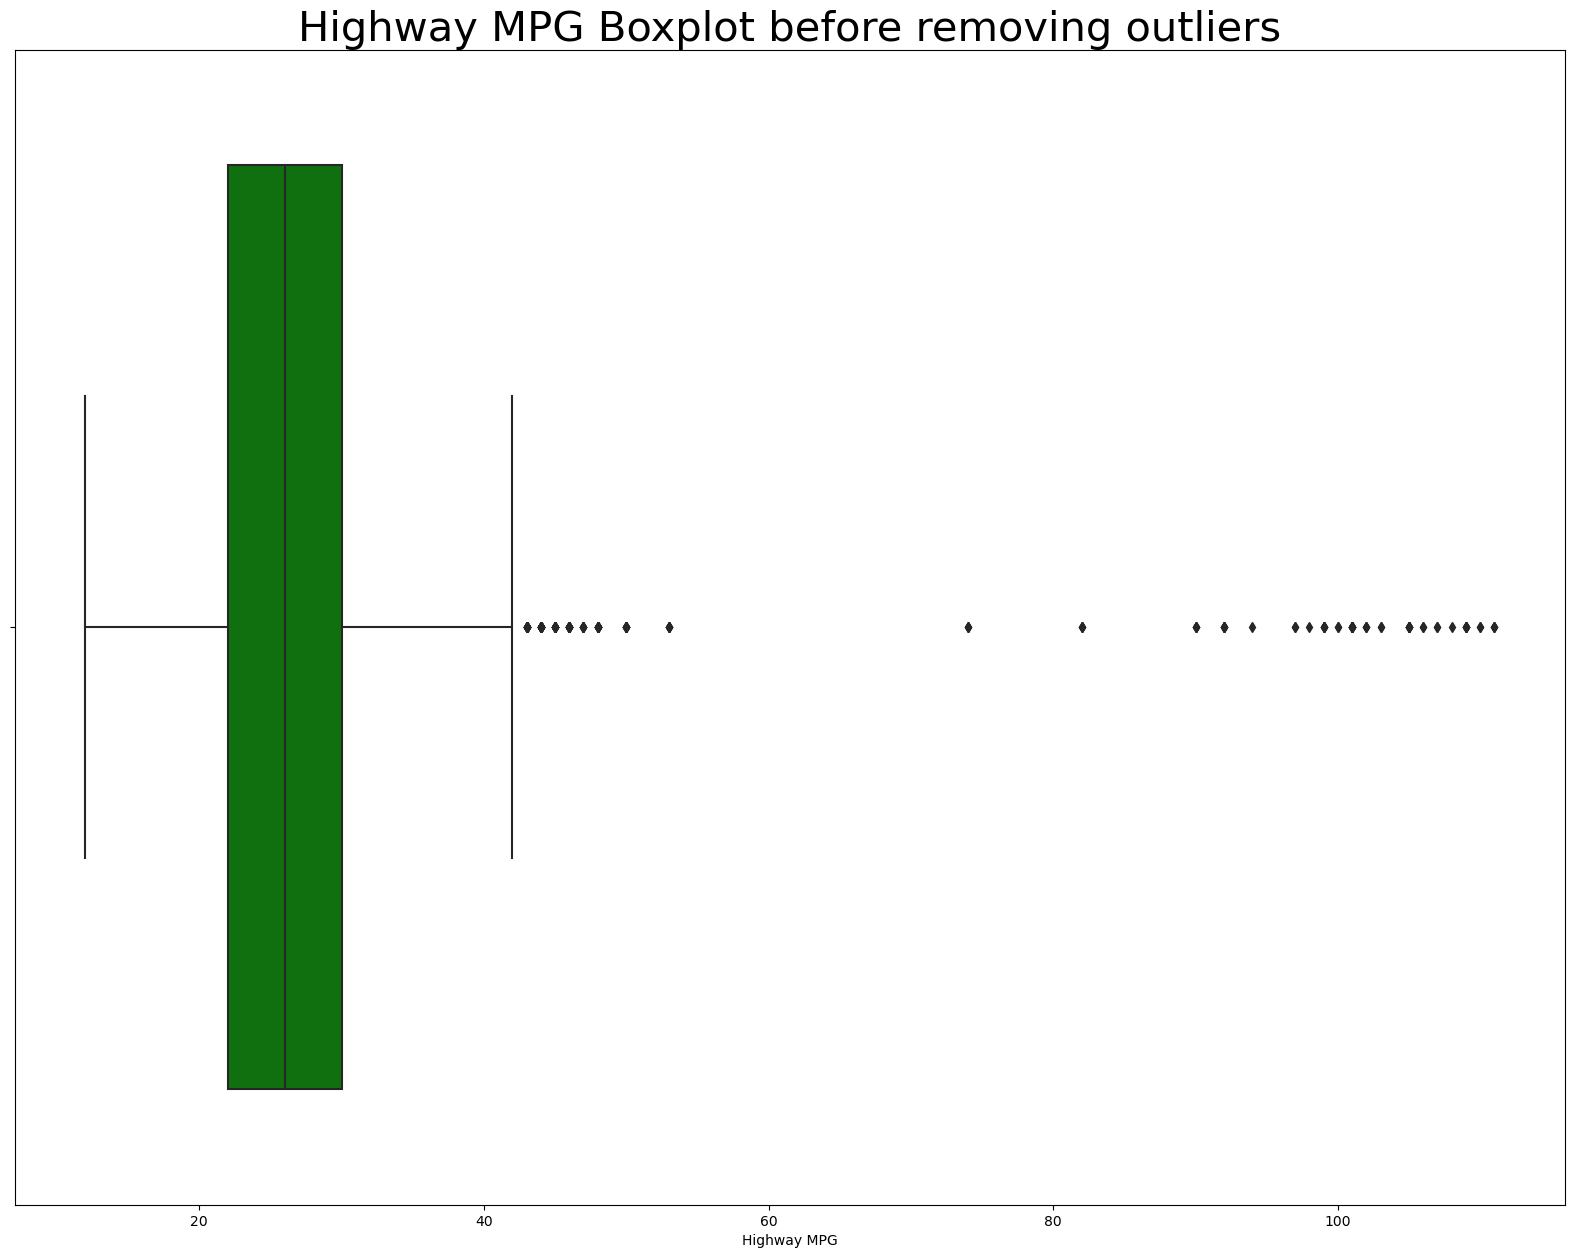

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


In [11]:
# Removing outliers by finding percentile values after displaying boxplot

plt.figure(figsize = (20,15))
sns.boxplot(x = 'highway MPG', data = data,color = 'green')
plt.title("Highway MPG Boxplot before removing outliers",fontsize = 30)
plt.xlabel("Highway MPG")
plt.show()

for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))
print("\n")

for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

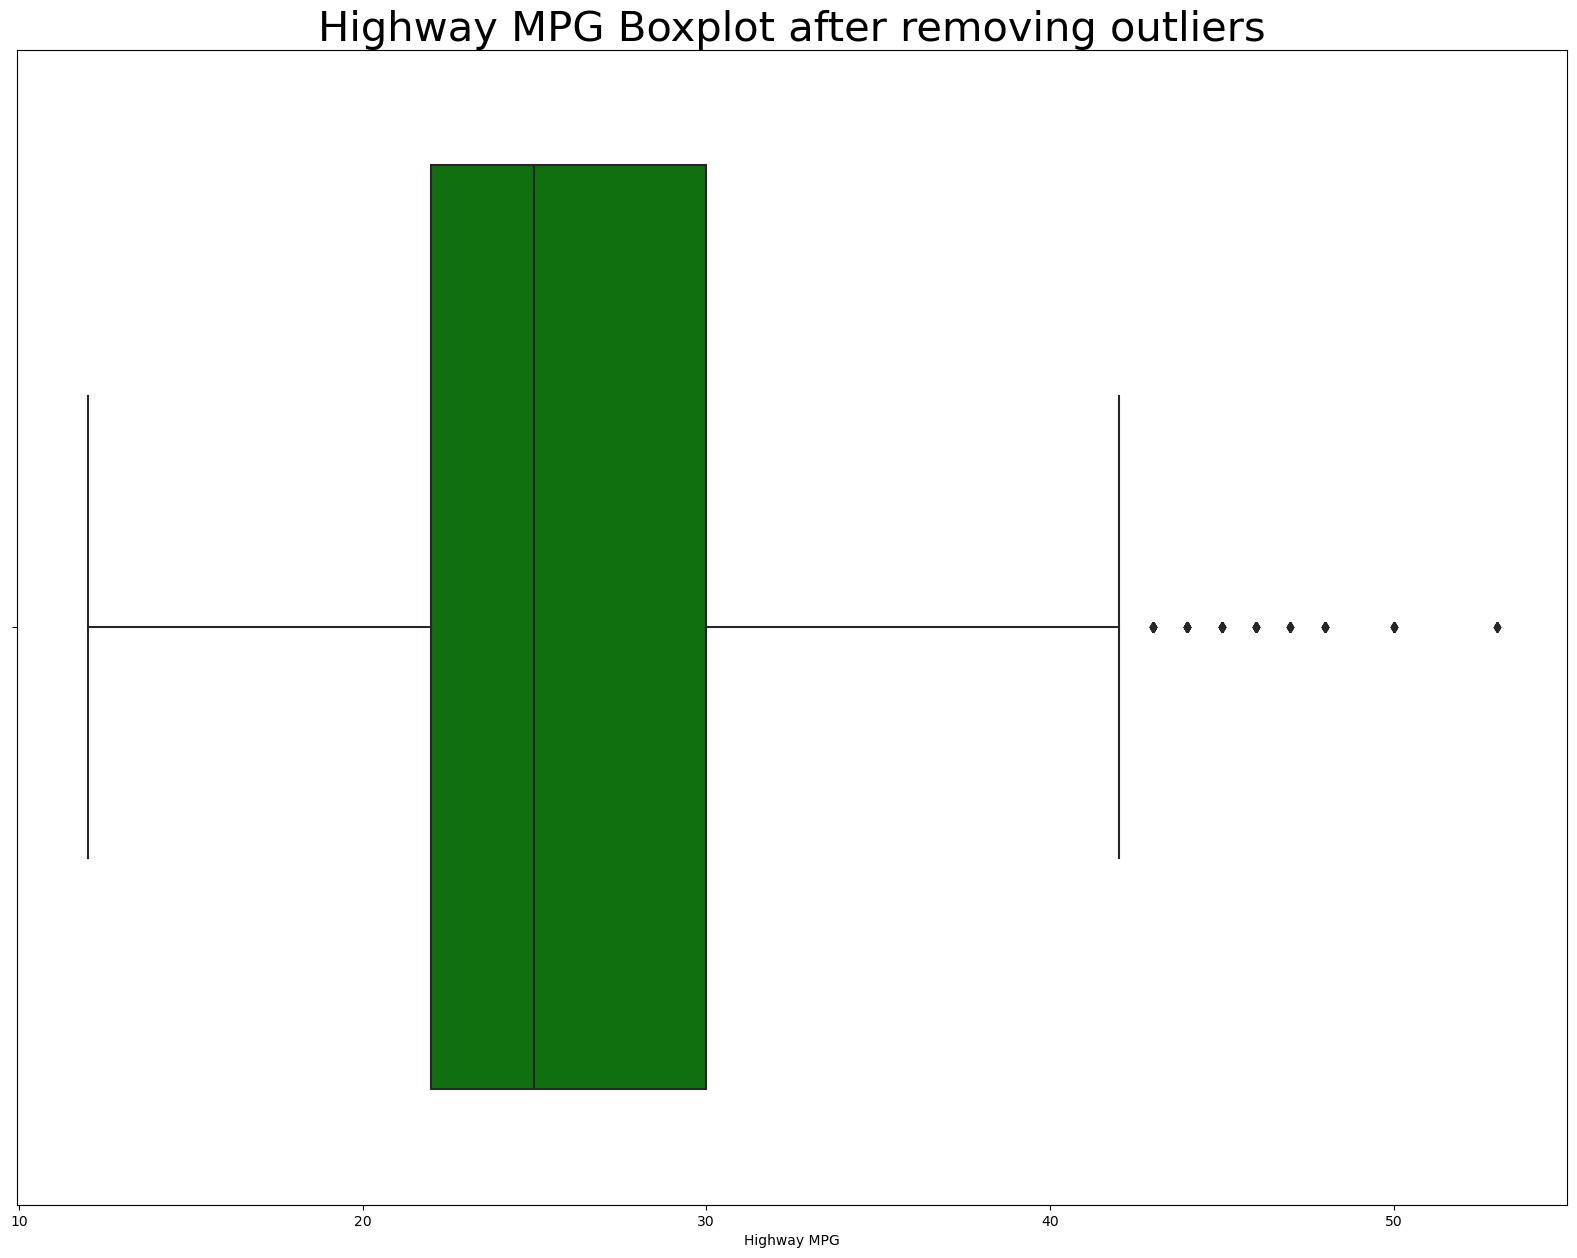

In [12]:
#Boxplot after removing outliers

data = data[data['highway MPG'] < 60]

plt.figure(figsize = (20,15))
sns.boxplot(x = 'highway MPG', data = data,color = 'green')
plt.title("Highway MPG Boxplot after removing outliers",fontsize = 30)
plt.xlabel("Highway MPG")
plt.show()

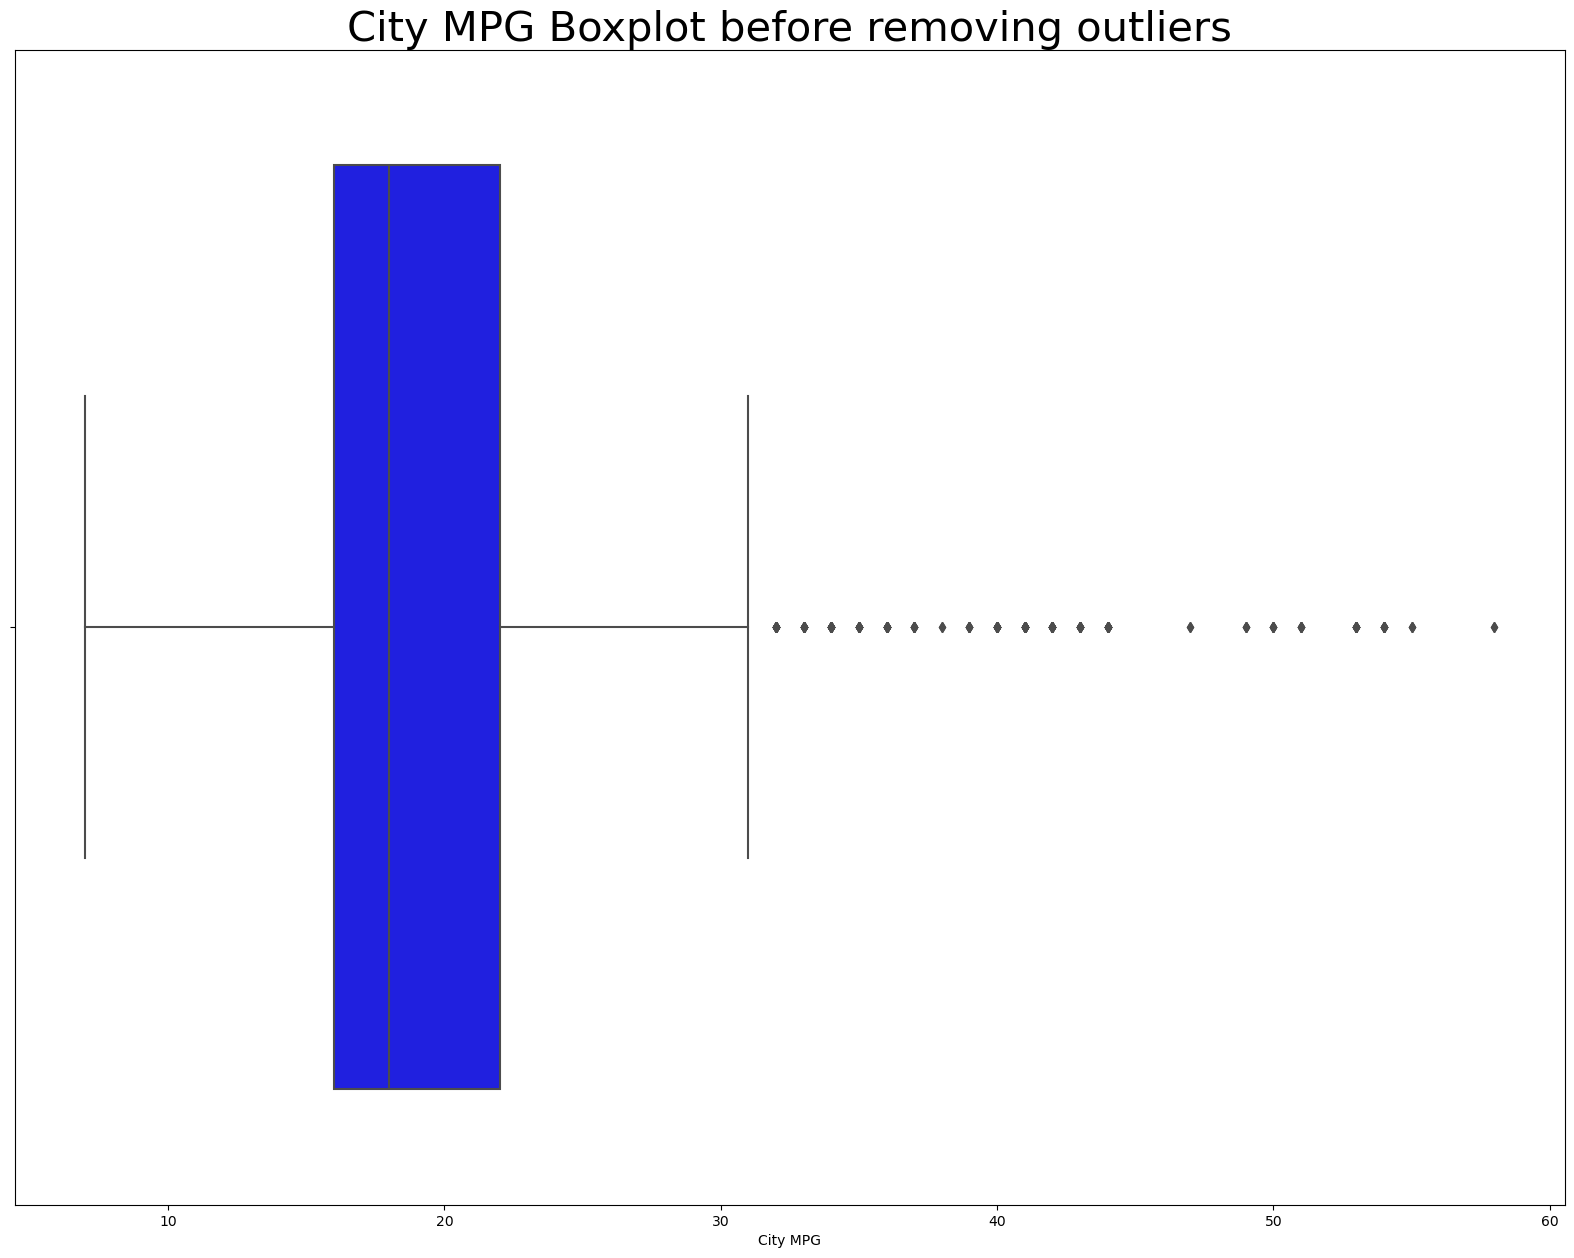

The 90.0th percentile value is 26.00
The 91.0th percentile value is 26.00
The 92.0th percentile value is 27.00
The 93.0th percentile value is 27.00
The 94.0th percentile value is 28.00
The 95.0th percentile value is 29.00
The 96.0th percentile value is 30.00
The 97.0th percentile value is 31.00
The 98.0th percentile value is 32.00
The 99.0th percentile value is 41.00


The 98.0th percentile value is 32.00
The 98.1th percentile value is 33.00
The 98.2th percentile value is 33.77
The 98.3th percentile value is 34.00
The 98.4th percentile value is 35.00
The 98.5th percentile value is 36.00
The 98.6th percentile value is 36.00
The 98.7th percentile value is 37.00
The 98.8th percentile value is 39.00
The 98.9th percentile value is 40.00
The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00

In [13]:
#Same done for 'City MPG'

plt.figure(figsize = (20,15))
sns.boxplot(x = 'city mpg', data = data,color = 'blue')
plt.title("City MPG Boxplot before removing outliers",fontsize = 30)
plt.xlabel("City MPG")
plt.show()

for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))
print('\n')

for i in [x * 0.1 for x in range(980, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))
 

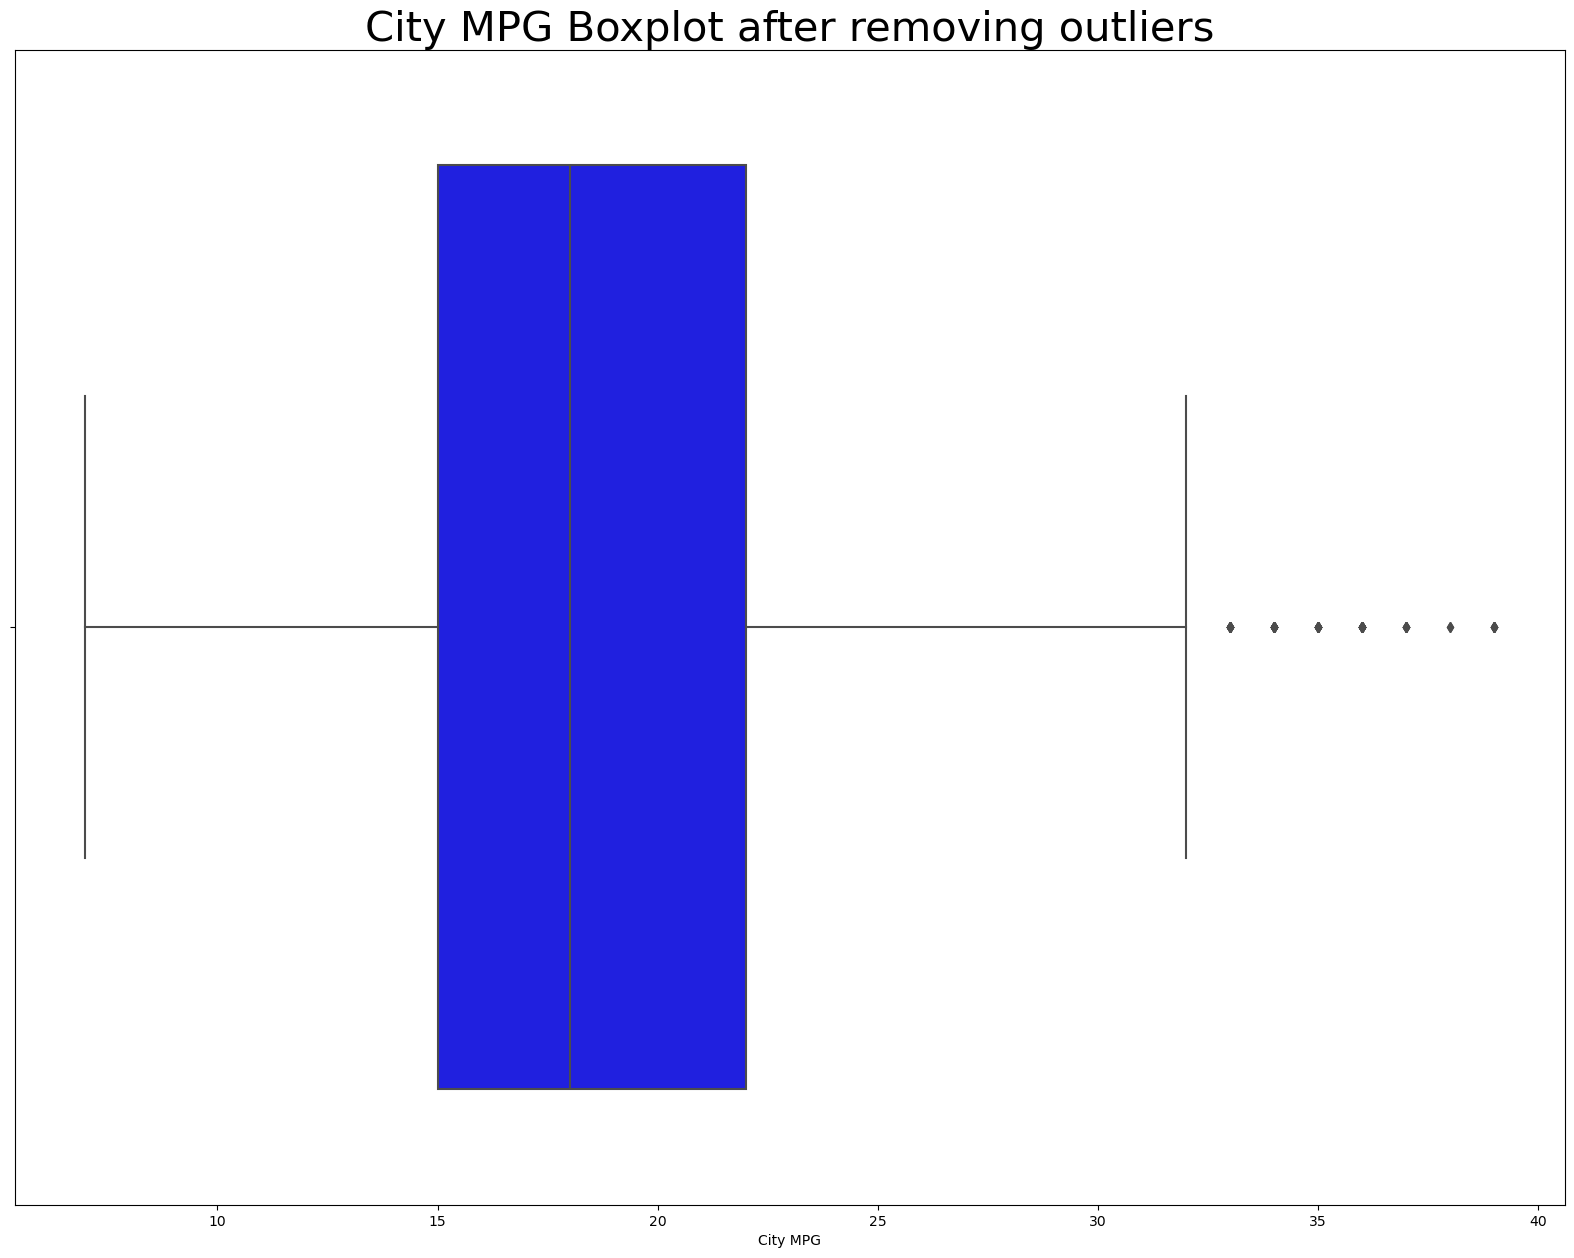

In [14]:
#Boxplot after removing outliers

data = data[data['city mpg'] < 40]

plt.figure(figsize = (20,15))
sns.boxplot(x = 'city mpg', data = data,color = 'blue')
plt.title("City MPG Boxplot after removing outliers",fontsize = 30)
plt.xlabel("City MPG")
plt.show()

In [15]:
#Checking NULL values

missing = data.isnull().sum()
print(missing)

#Fill with median values

data['Number of Doors'].fillna(data['Number of Doors'].median(),inplace = True)

noofdoorsmissing = data['Number of Doors'].isnull().sum()
print(f'\nNumber of missing values in [Number of Doors]: {noofdoorsmissing}')

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Number of missing values in [Number of Doors]: 0


In [16]:
#Likewise for other features

data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)
data['Engine HP'].fillna(data['Engine HP'].median(), inplace = True)
data['Engine Cylinders'].fillna(4, inplace = True)

data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [17]:
#Dropping Market Category feature as too many missing values

data.drop(['Market Category'], inplace = True, axis = 1)
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [18]:
#Shuffling data and splitting Data into train and test set with 80-20 split.

shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [19]:
#Encoding to convert categorical features to numerical features

#Target encoding for categorical features with high number of features

encoder = TargetEncoder(cols = 'Year')
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )
X_train['Year'] = encoder.transform(X_train['Year'])
X_test['Year'] = encoder.transform(X_test['Year'])

encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])

encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
1354,10812.757938,30176.543012,36784.190660,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26
896,28423.023983,25245.937696,2558.613101,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376
2635,28230.392090,5061.892819,2558.613101,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385
11165,196884.138144,97860.899828,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259
2554,26660.798742,22687.787683,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202


In [20]:
#One Hot Encoding for categorical features with few number of features

encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

In [21]:
X_train.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Engine Fuel Type_1,...,Vehicle Style_7,Vehicle Style_8,Vehicle Style_9,Vehicle Style_10,Vehicle Style_11,Vehicle Style_12,Vehicle Style_13,Vehicle Style_14,Vehicle Style_15,Vehicle Style_16
1354,10812.757938,30176.543012,36784.190660,140.0,4.0,4.0,30,21,26,1,...,0,0,0,0,0,0,0,0,0,0
896,28423.023983,25245.937696,2558.613101,185.0,4.0,2.0,25,18,376,1,...,0,0,0,0,0,0,0,0,0,0
2635,28230.392090,5061.892819,2558.613101,200.0,6.0,2.0,18,14,1385,1,...,0,0,0,0,0,0,0,0,0,0
11165,196884.138144,97860.899828,46953.929157,430.0,8.0,2.0,19,13,259,0,...,0,0,0,0,0,0,0,0,0,0
2554,26660.798742,22687.787683,46953.929157,143.0,4.0,4.0,39,30,2202,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Standardization and Normalization of Data

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

X_train_new.shape

(9364, 46)

# Comparison of Different Machine Learning Models

## Linear Regression

In [23]:
error_mean_square = []
error_mean_absolute = []
error_root_mean_square = []
error_r_squared = []

model = LinearRegression()
model.fit(X_train_new, y_train)

y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,11476.951720,24660
1,14522.146184,2000
2,70454.251781,49770
3,29525.276266,20875
4,307776.371569,284976


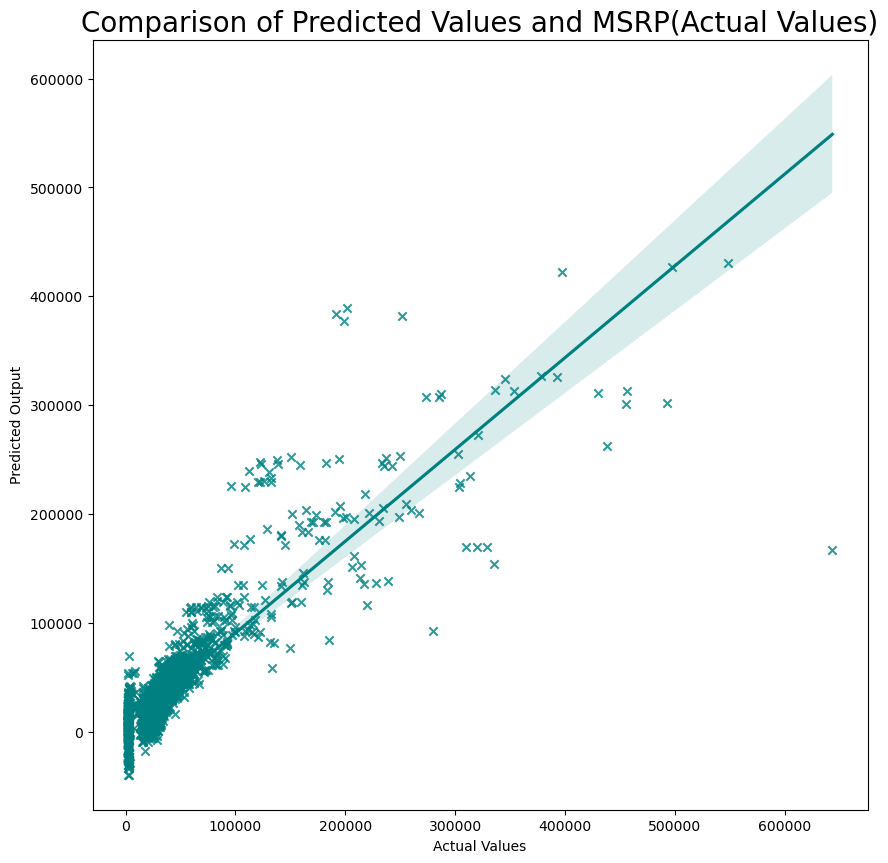

In [24]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='teal',marker = 'x')
plt.title("Comparison of Predicted Values and MSRP(Actual Values)", fontsize=20)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Output")
plt.show()

error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
error_root_mean_square.append(int(np.sqrt(mean_squared_error(y_predict,y_test))))
error_r_squared.append(r2_score(y_test,y_predict))

## K - Nearest Neighbours Regressor

In [25]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

results.head()

,Predicted Output,MSRP
0,24416.0,24660
1,2039.5,2000
2,51845.0,49770
3,18685.0,20875
4,277078.0,284976


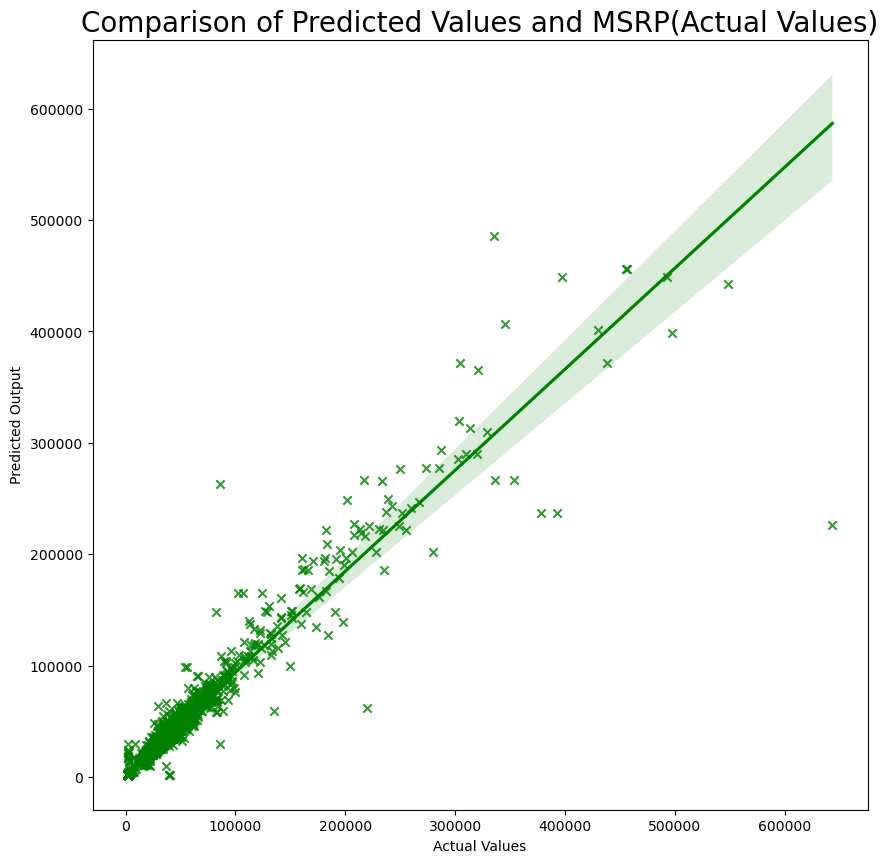

In [26]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='green',marker = 'x')
plt.title("Comparison of Predicted Values and MSRP(Actual Values)", fontsize=20)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Output")
plt.show()

error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
error_root_mean_square.append(int(np.sqrt(mean_squared_error(y_predict,y_test))))
error_r_squared.append(r2_score(y_test,y_predict))

## Support Vector Regressor(SVM)

In [27]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,29749.232558,24660
1,29560.908265,2000
2,30533.052210,49770
3,29157.826878,20875
4,30391.080446,284976


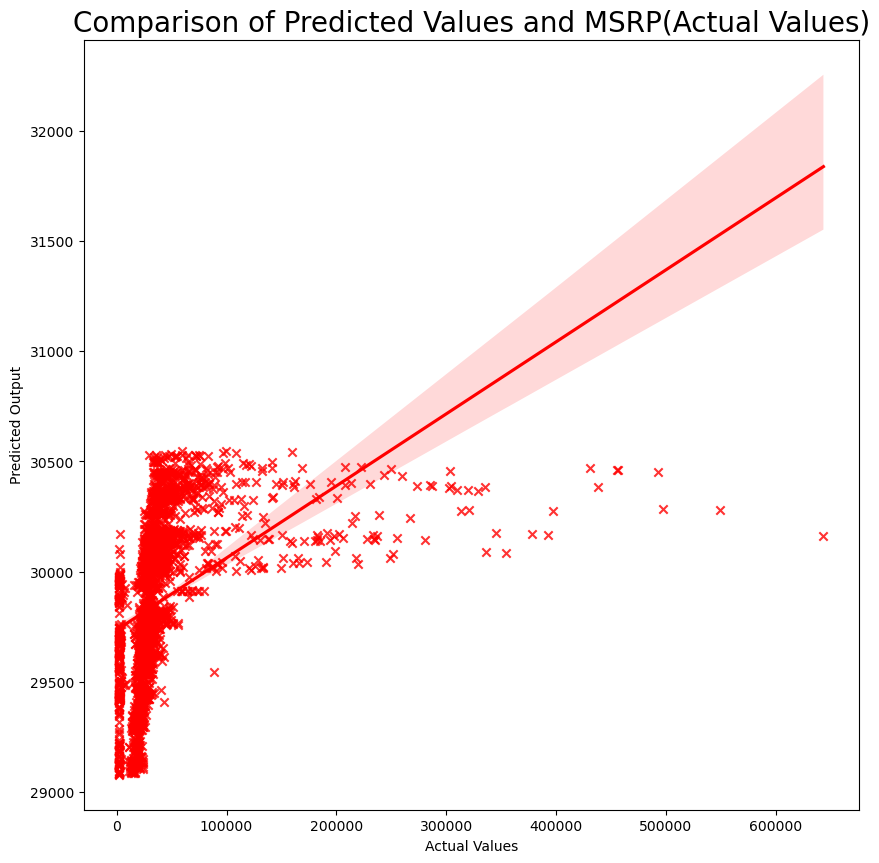

In [28]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='red',marker = 'x')
plt.title("Comparison of Predicted Values and MSRP(Actual Values)", fontsize=20)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Output")
plt.show()

error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
error_root_mean_square.append(int(np.sqrt(mean_squared_error(y_predict,y_test))))
error_r_squared.append(r2_score(y_test,y_predict))

## Decision Tree Regressor

In [29]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,24462.0,24660
1,2000.0,2000
2,50800.0,49770
3,16495.0,20875
4,275861.0,284976


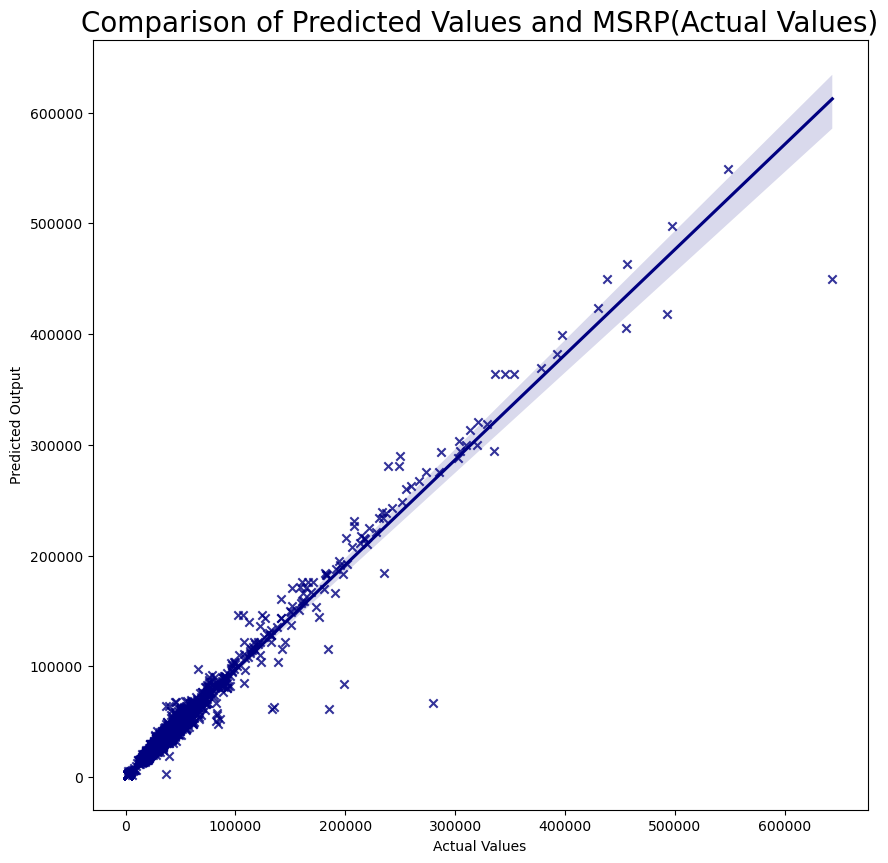

In [30]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='navy',marker = 'x')
plt.title("Comparison of Predicted Values and MSRP(Actual Values)", fontsize=20)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Output")
plt.show()

error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
error_root_mean_square.append(int(np.sqrt(mean_squared_error(y_predict,y_test))))
error_r_squared.append(r2_score(y_test,y_predict))

## Random Forest Regressor

In [31]:
model = RandomForestRegressor(n_estimators = 150)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,24650.764603,24660
1,2000.000000,2000
2,51843.705820,49770
3,17179.268889,20875
4,276523.928667,284976


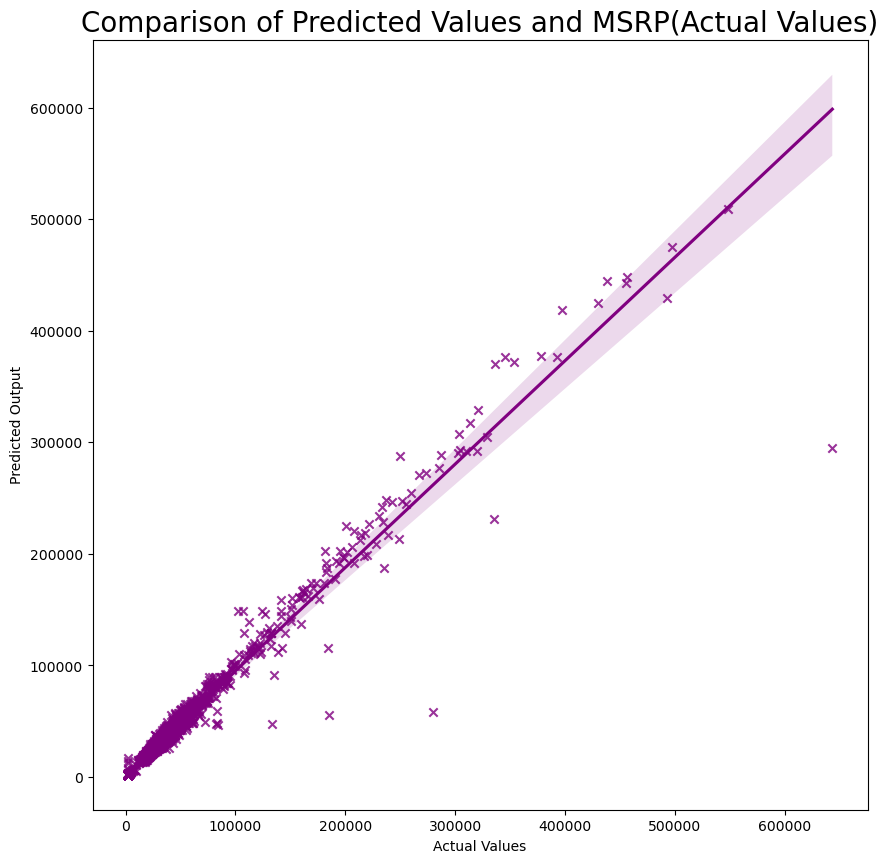

In [32]:
plt.figure(figsize=(10, 10))
sns.regplot(data=results, x='MSRP', y='Predicted Output', color='purple',marker = 'x')
plt.title("Comparison of Predicted Values and MSRP(Actual Values)", fontsize=20)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Output")
plt.show()

error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
error_root_mean_square.append(int(np.sqrt(mean_squared_error(y_predict,y_test))))
error_r_squared.append(r2_score(y_test,y_predict))

# Analysis of Machine Learning Models

In [33]:
#Accumulating all MSE and MAE

data = {'Models': ['Linear Regression', 'K- Nearest Neighbours Regressor', 'Support Vector Regressor(SVM)', 'Decision Tree Regressor', 'Random Forest Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square,'Root Mean Squared Error': error_root_mean_square,'R2 Score': error_r_squared}
model_dataframe = pd.DataFrame(data)

model_dataframe

,Models,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,Linear Regression,13039,596075909,24414,0.766485
1,K- Nearest Neighbours Regressor,4557,205751057,14344,0.919396
2,Support Vector Regressor(SVM),22355,2644459970,51424,-0.035979
3,Decision Tree Regressor,3316,84551777,9195,0.966876
4,Random Forest Regressor,3113,115397845,10742,0.954792


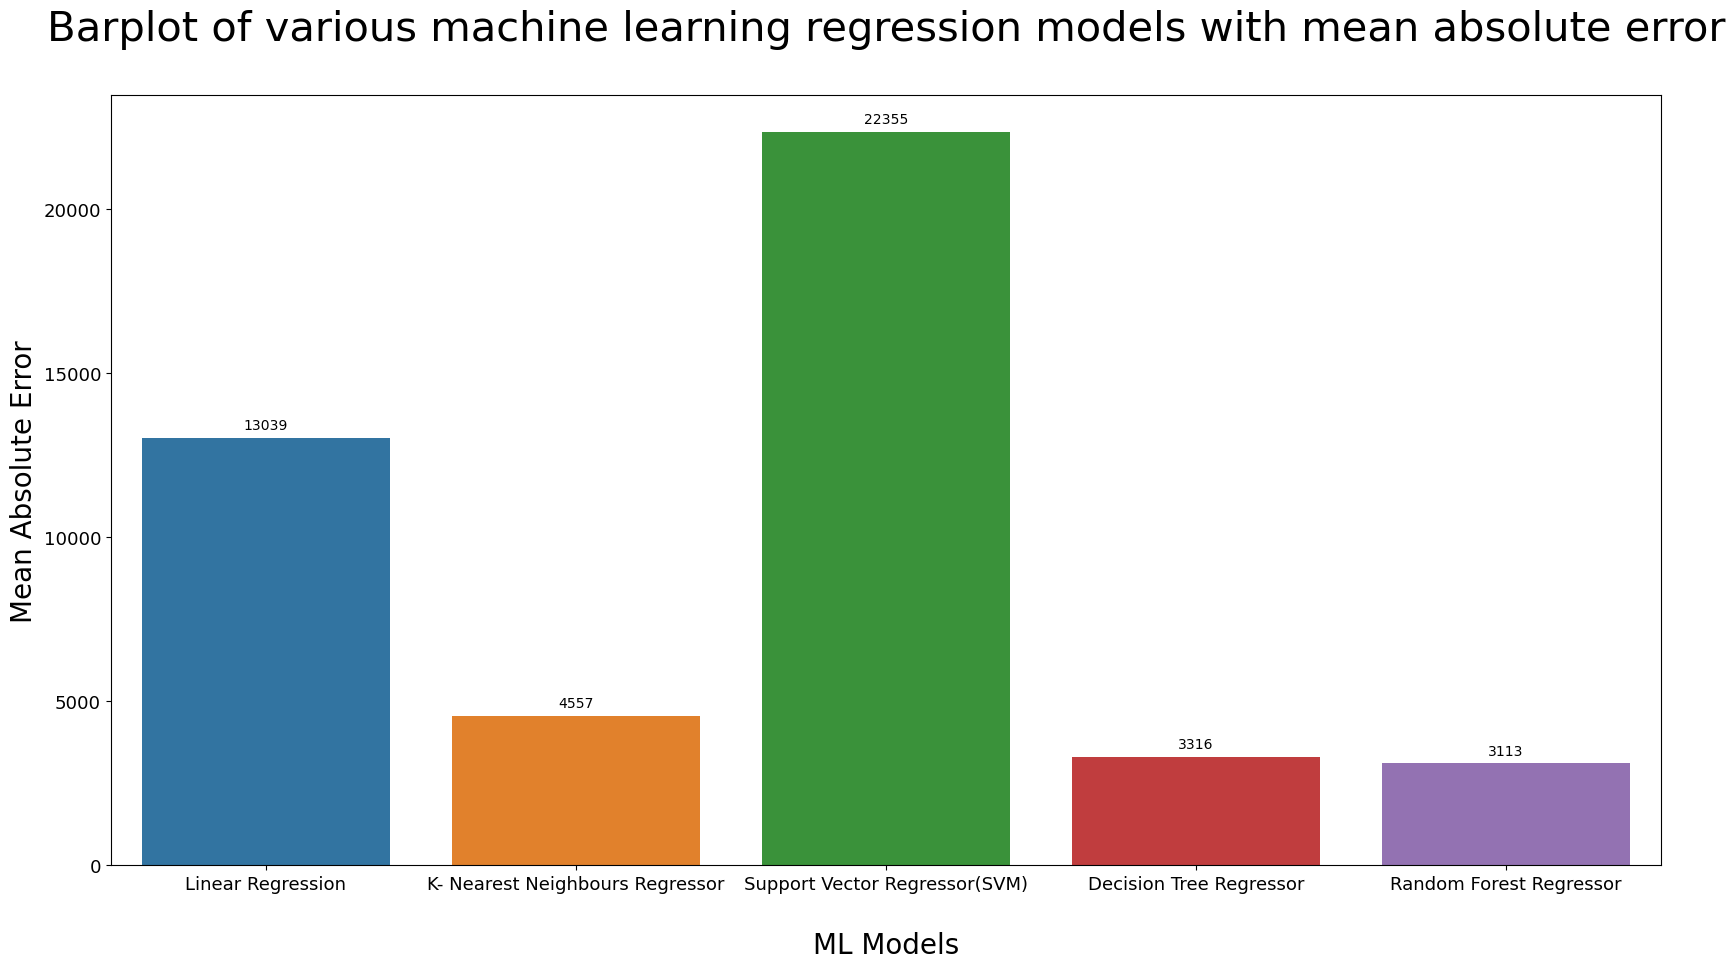

In [34]:
#Display barplot of MAE and MSE

plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("Mean Absolute Error",fontsize = 20)
plt.xlabel("\nML Models",fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error\n", fontsize = 30)
plt.show()

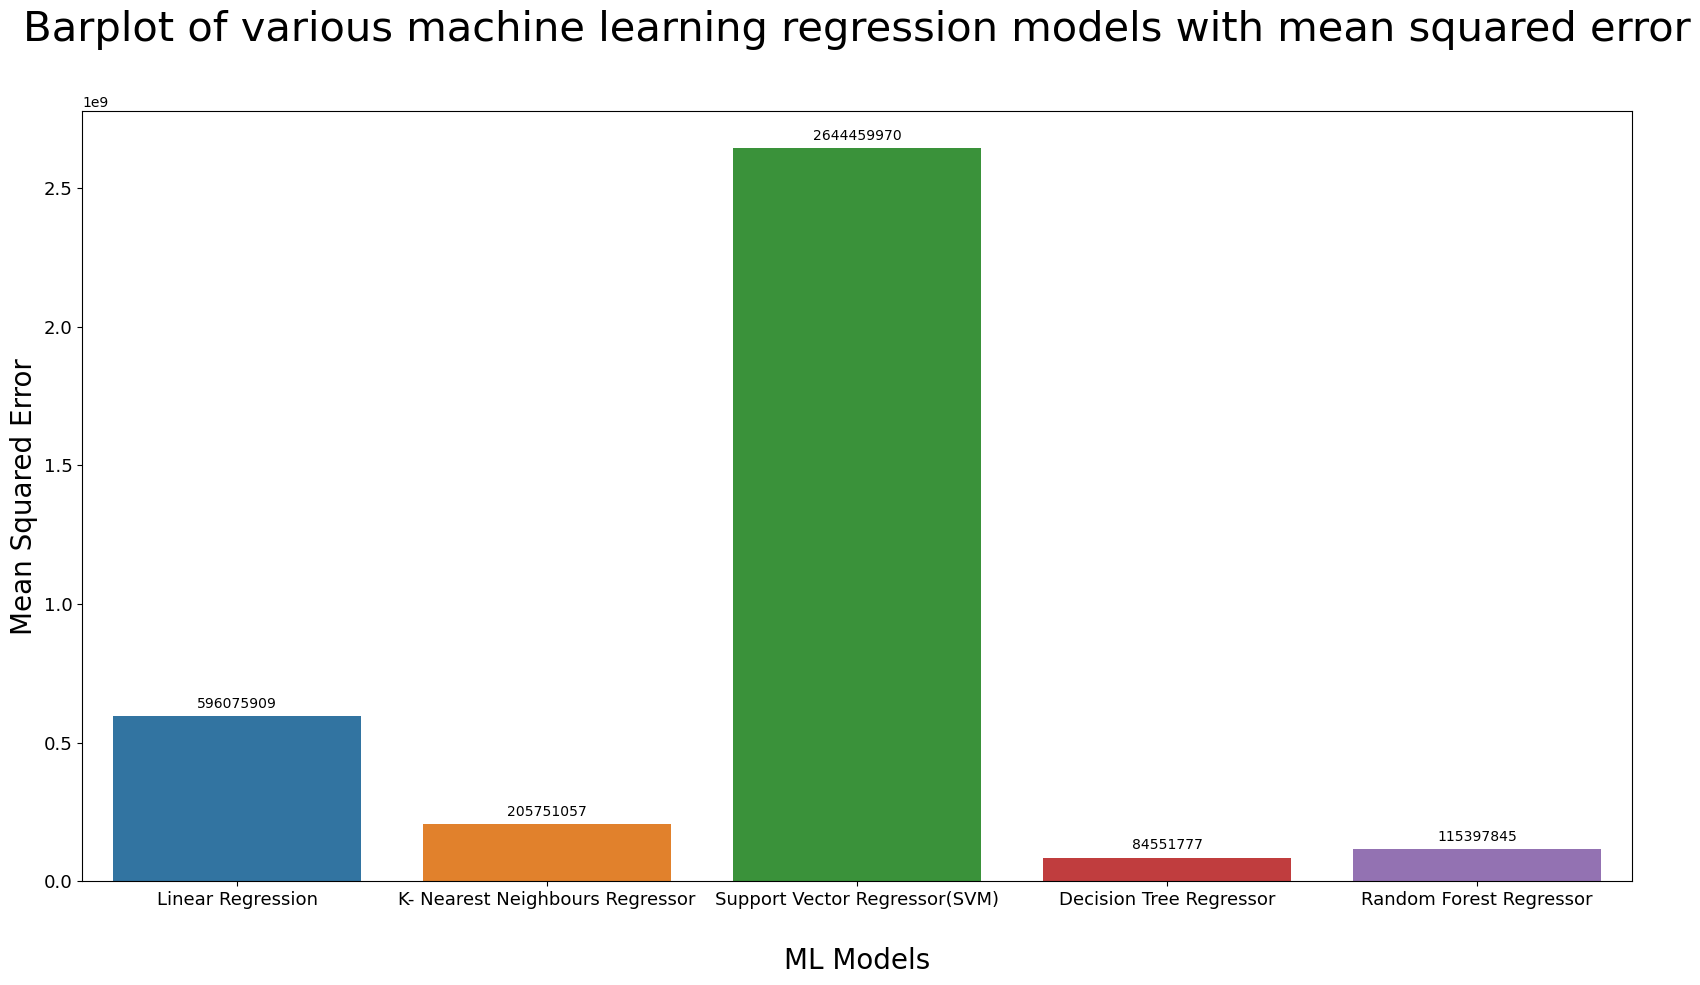

In [35]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("Mean Squared Error",fontsize = 20)
plt.xlabel("\nML Models",fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error\n", fontsize = 30)
plt.show()

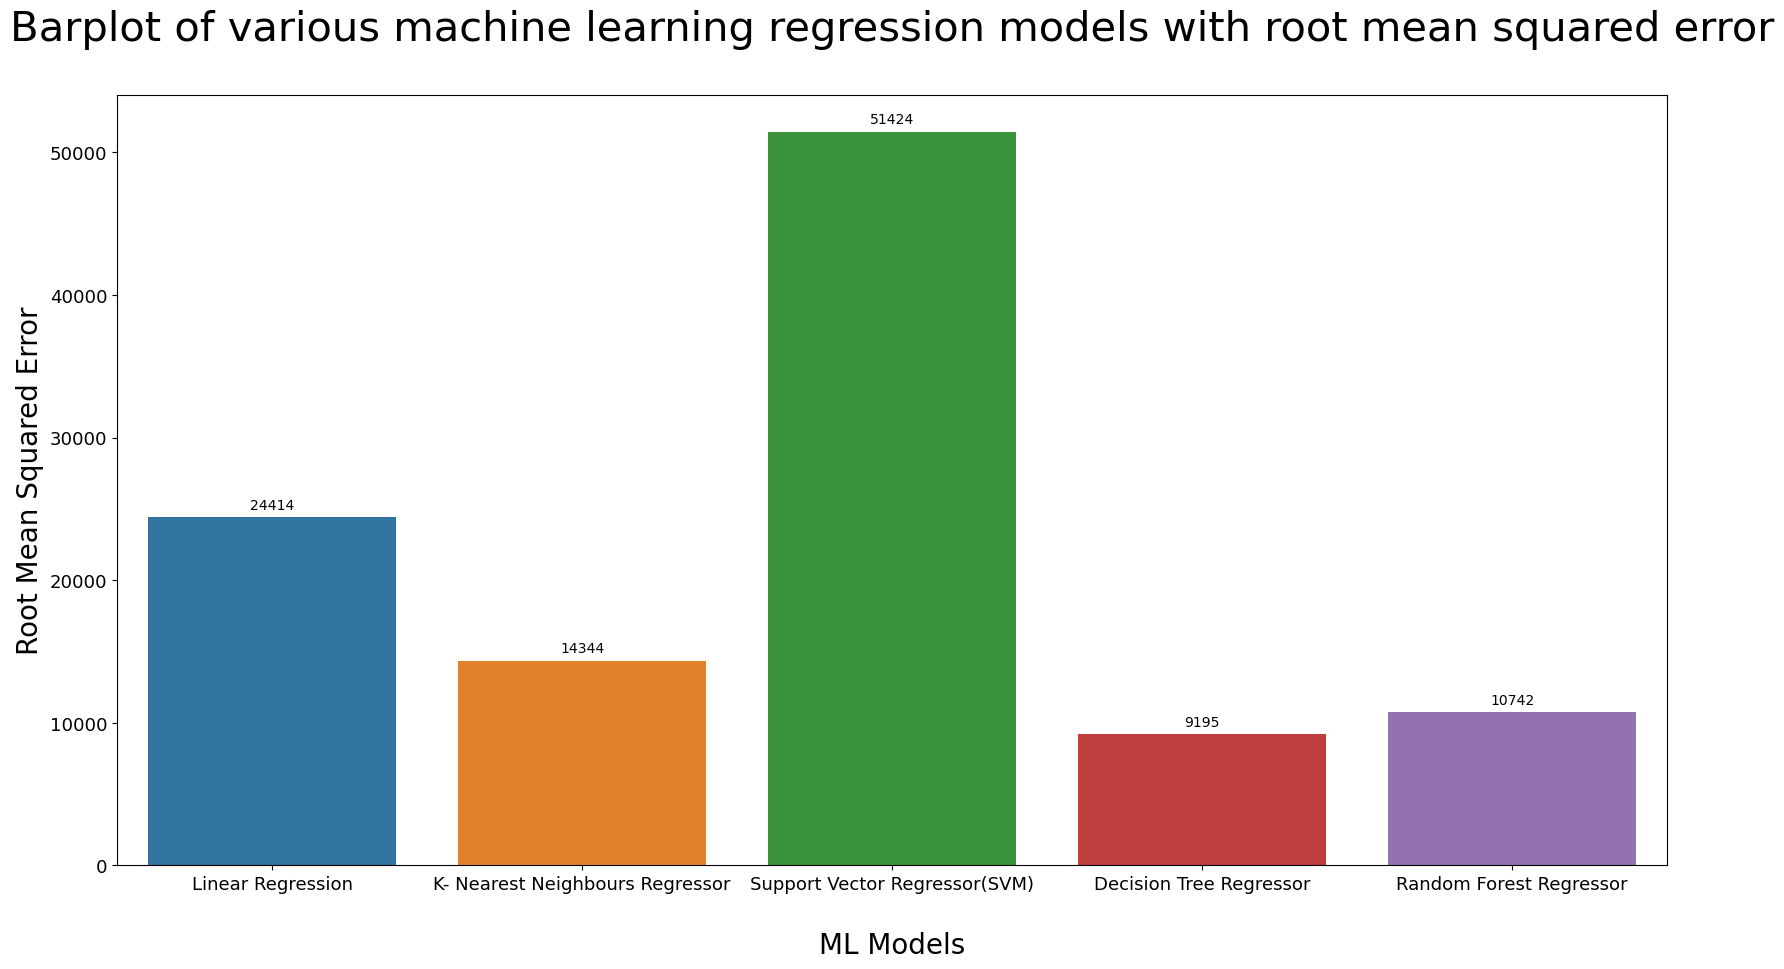

In [36]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Root Mean Squared Error')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("Root Mean Squared Error",fontsize = 20)
plt.xlabel("\nML Models",fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with root mean squared error\n", fontsize = 30)
plt.show()

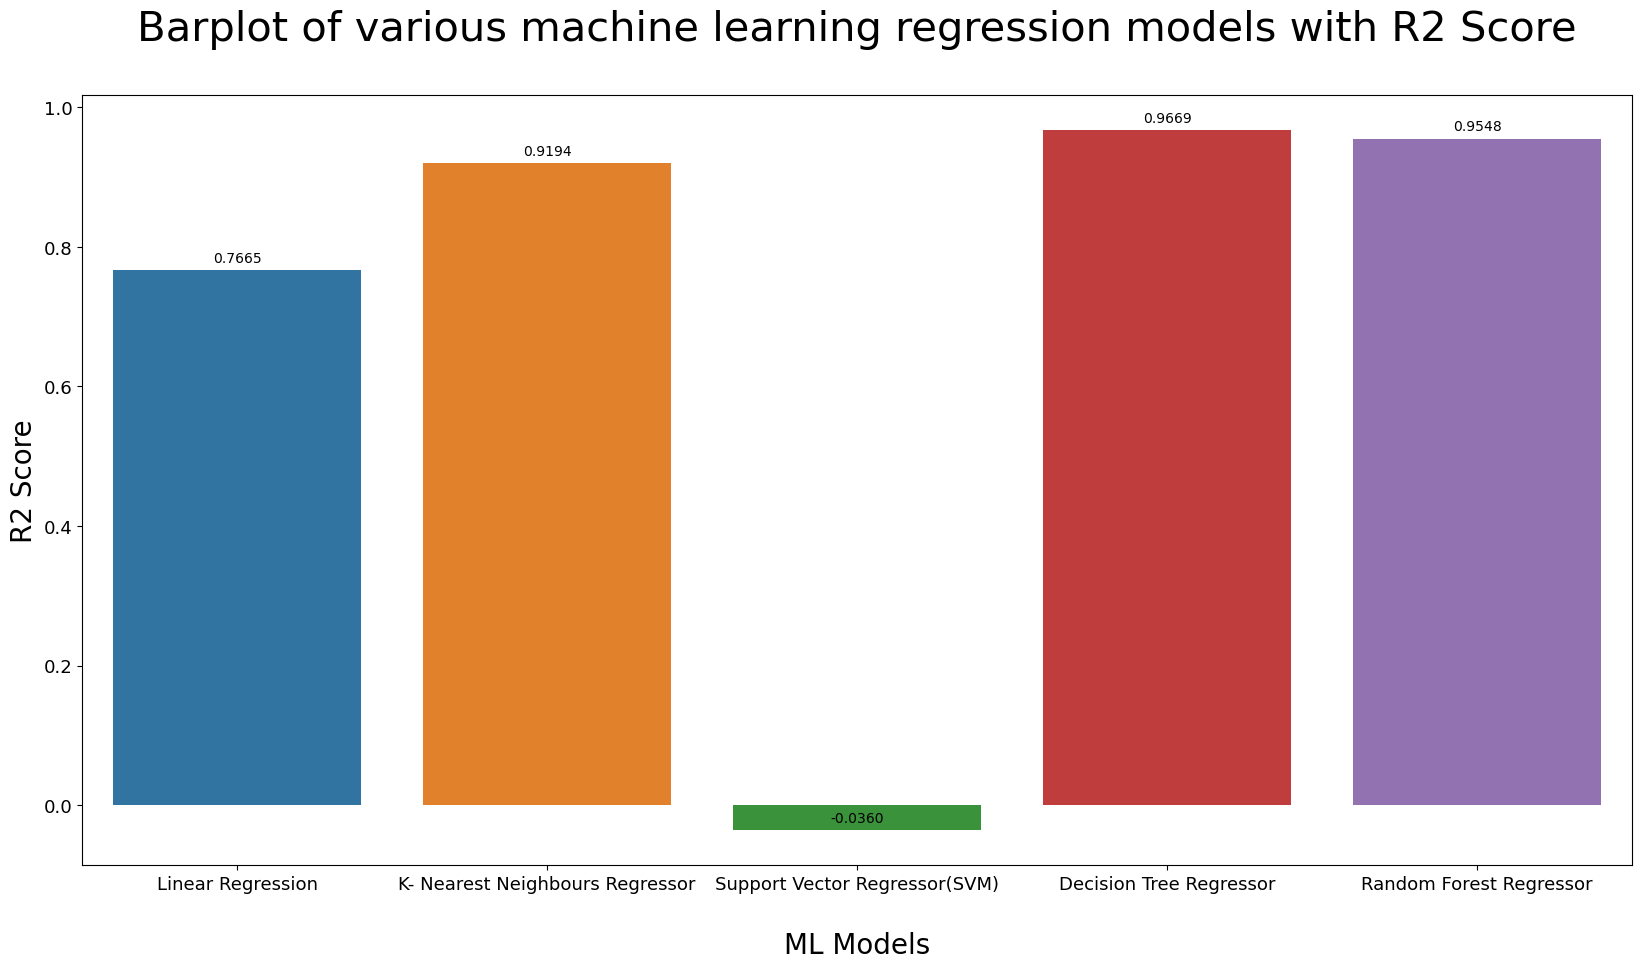

In [37]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'R2 Score')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("R2 Score",fontsize = 20)
plt.xlabel("\nML Models",fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with R2 Score\n", fontsize = 30)
plt.show()